# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [61]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)
#helper.download_extract('celeba', cele_data_dir)

Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

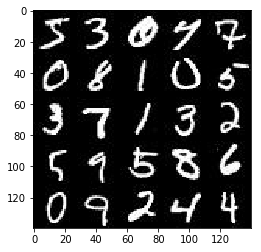

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

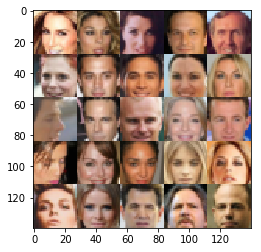

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.0-rc1
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    image = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name = 'real_input')
    z = tf.placeholder(tf.float32, [None, z_dim], name = 'z_dim')
    lr = tf.placeholder(tf.float32, name = 'learning_rate')
    return image, z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "D:\\Anaconda3\\lib\\runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "D:\\Anaconda3\\lib\\runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "D:\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "D:\\Anaconda3\\lib\\site-packages\\traitlets\\config\\application.py", line 658, in launch_instance\n    app.start()', 'File "D:\\Anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "D:\\Anaconda3\\lib\\site-packages\\zmq\\eventloop\\ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "D:\\Anaconda3\\l

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [ ]:
def discriminator(images, reuse=False, alpha = 0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3 or 28x28x1
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='SAME')
        relu1 = tf.maximum(alpha * x1, x1)
        relu1 = tf.nn.dropout(relu1, 0.8)
        #print(x1.get_shape())
        # 14x14x128
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='SAME')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        relu2 = tf.nn.dropout(relu2, 0.8)
        #print(x2.get_shape())
        # 7x7x256
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='SAME')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        relu3 = tf.nn.dropout(relu3, 0.8)
        # 4x4x512
        #print(x3.get_shape())

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
        
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [91]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse = not is_train):
        x1 = tf.layers.dense(z, 7*7*512)
        
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.8)
        #print(x1.get_shape())
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='SAME')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.get_shape())
        # 14x14x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='SAME')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.get_shape())
        # 28x28x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='SAME')
        # 28x28x3 now
        
        output = tf.tanh(logits)     
        
        
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [16]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return g_loss, d_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [17]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [74]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    g_loss, d_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            step = 0
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim)).astype(np.float32)
                
                # 这里run两次g_train_opt，为了避免辨别器收敛太快，导致生成的图片完全没有能力PK
                # 参考 https://github.com/carpedm20/DCGAN-tensorflow
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if step % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count), "Batch {} ".format(step),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                if step % 100 == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Batch 10  Discriminator Loss: 0.1506... Generator Loss: 3.9519
Epoch 1/2... Batch 20  Discriminator Loss: 1.8186... Generator Loss: 0.4201
Epoch 1/2... Batch 30  Discriminator Loss: 4.1537... Generator Loss: 0.5410
Epoch 1/2... Batch 40  Discriminator Loss: 3.1981... Generator Loss: 0.2353
Epoch 1/2... Batch 50  Discriminator Loss: 1.5132... Generator Loss: 0.9532
Epoch 1/2... Batch 60  Discriminator Loss: 1.7316... Generator Loss: 0.3201
Epoch 1/2... Batch 70  Discriminator Loss: 1.2854... Generator Loss: 0.8033
Epoch 1/2... Batch 80  Discriminator Loss: 0.9268... Generator Loss: 2.2402
Epoch 1/2... Batch 90  Discriminator Loss: 0.9217... Generator Loss: 0.7015
Epoch 1/2... Batch 100  Discriminator Loss: 0.6269... Generator Loss: 1.2886


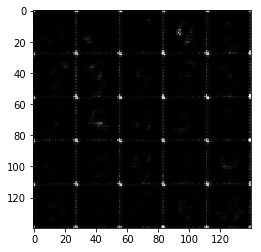

Epoch 1/2... Batch 110  Discriminator Loss: 0.4898... Generator Loss: 4.3869
Epoch 1/2... Batch 120  Discriminator Loss: 0.1926... Generator Loss: 3.7936
Epoch 1/2... Batch 130  Discriminator Loss: 0.0905... Generator Loss: 5.1076
Epoch 1/2... Batch 140  Discriminator Loss: 0.3129... Generator Loss: 8.1492
Epoch 1/2... Batch 150  Discriminator Loss: 0.8381... Generator Loss: 1.0283
Epoch 1/2... Batch 160  Discriminator Loss: 0.4980... Generator Loss: 1.7098
Epoch 1/2... Batch 170  Discriminator Loss: 0.3087... Generator Loss: 1.7675
Epoch 1/2... Batch 180  Discriminator Loss: 0.2003... Generator Loss: 10.0008
Epoch 1/2... Batch 190  Discriminator Loss: 4.4561... Generator Loss: 15.6206
Epoch 1/2... Batch 200  Discriminator Loss: 1.5077... Generator Loss: 0.5970


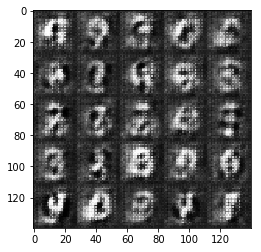

Epoch 1/2... Batch 210  Discriminator Loss: 1.3505... Generator Loss: 0.5812
Epoch 1/2... Batch 220  Discriminator Loss: 0.1362... Generator Loss: 3.0231
Epoch 1/2... Batch 230  Discriminator Loss: 0.4133... Generator Loss: 1.8014
Epoch 1/2... Batch 240  Discriminator Loss: 1.0056... Generator Loss: 1.5577
Epoch 1/2... Batch 250  Discriminator Loss: 1.6945... Generator Loss: 0.4471
Epoch 1/2... Batch 260  Discriminator Loss: 0.6908... Generator Loss: 1.6633
Epoch 1/2... Batch 270  Discriminator Loss: 0.6452... Generator Loss: 3.1526
Epoch 1/2... Batch 280  Discriminator Loss: 0.3667... Generator Loss: 1.5812
Epoch 1/2... Batch 290  Discriminator Loss: 0.9788... Generator Loss: 0.7252
Epoch 1/2... Batch 300  Discriminator Loss: 0.4146... Generator Loss: 3.0531


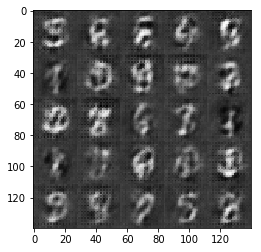

Epoch 1/2... Batch 310  Discriminator Loss: 0.1965... Generator Loss: 2.5240
Epoch 1/2... Batch 320  Discriminator Loss: 1.1655... Generator Loss: 4.4384
Epoch 1/2... Batch 330  Discriminator Loss: 0.8146... Generator Loss: 3.6602
Epoch 1/2... Batch 340  Discriminator Loss: 0.2541... Generator Loss: 7.2791
Epoch 1/2... Batch 350  Discriminator Loss: 0.4007... Generator Loss: 1.9855
Epoch 1/2... Batch 360  Discriminator Loss: 0.3932... Generator Loss: 5.4704
Epoch 1/2... Batch 370  Discriminator Loss: 2.3913... Generator Loss: 10.2560
Epoch 1/2... Batch 380  Discriminator Loss: 0.5960... Generator Loss: 1.1598
Epoch 1/2... Batch 390  Discriminator Loss: 1.2049... Generator Loss: 0.8778
Epoch 1/2... Batch 400  Discriminator Loss: 1.6268... Generator Loss: 0.3555


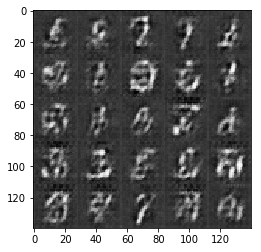

Epoch 1/2... Batch 410  Discriminator Loss: 0.3441... Generator Loss: 1.9011
Epoch 1/2... Batch 420  Discriminator Loss: 0.8858... Generator Loss: 0.8200
Epoch 1/2... Batch 430  Discriminator Loss: 1.3877... Generator Loss: 0.3932
Epoch 1/2... Batch 440  Discriminator Loss: 0.7866... Generator Loss: 1.0010
Epoch 1/2... Batch 450  Discriminator Loss: 0.4672... Generator Loss: 1.8676
Epoch 1/2... Batch 460  Discriminator Loss: 0.8792... Generator Loss: 0.8745
Epoch 1/2... Batch 470  Discriminator Loss: 0.5833... Generator Loss: 1.9047
Epoch 1/2... Batch 480  Discriminator Loss: 0.4509... Generator Loss: 1.4720
Epoch 1/2... Batch 490  Discriminator Loss: 0.4119... Generator Loss: 2.2732
Epoch 1/2... Batch 500  Discriminator Loss: 0.5711... Generator Loss: 2.7122


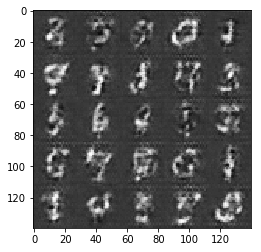

Epoch 1/2... Batch 510  Discriminator Loss: 0.6817... Generator Loss: 2.0332
Epoch 1/2... Batch 520  Discriminator Loss: 1.6163... Generator Loss: 0.4067
Epoch 1/2... Batch 530  Discriminator Loss: 0.8516... Generator Loss: 1.9853
Epoch 1/2... Batch 540  Discriminator Loss: 0.3535... Generator Loss: 2.1167
Epoch 1/2... Batch 550  Discriminator Loss: 0.5134... Generator Loss: 3.4578
Epoch 1/2... Batch 560  Discriminator Loss: 1.0376... Generator Loss: 0.7339
Epoch 1/2... Batch 570  Discriminator Loss: 0.6777... Generator Loss: 1.2444
Epoch 1/2... Batch 580  Discriminator Loss: 0.6803... Generator Loss: 1.2650
Epoch 1/2... Batch 590  Discriminator Loss: 1.3302... Generator Loss: 0.4818
Epoch 1/2... Batch 600  Discriminator Loss: 0.3927... Generator Loss: 3.8727


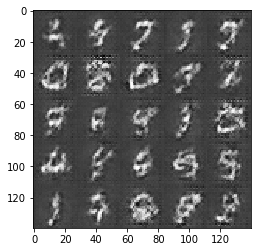

Epoch 1/2... Batch 610  Discriminator Loss: 1.9480... Generator Loss: 0.2906
Epoch 1/2... Batch 620  Discriminator Loss: 0.3518... Generator Loss: 2.1822
Epoch 1/2... Batch 630  Discriminator Loss: 0.6863... Generator Loss: 1.9688
Epoch 1/2... Batch 640  Discriminator Loss: 0.3277... Generator Loss: 3.9010
Epoch 1/2... Batch 650  Discriminator Loss: 1.9679... Generator Loss: 0.2023
Epoch 1/2... Batch 660  Discriminator Loss: 1.1395... Generator Loss: 0.6938
Epoch 1/2... Batch 670  Discriminator Loss: 0.4123... Generator Loss: 3.2726
Epoch 1/2... Batch 680  Discriminator Loss: 0.3274... Generator Loss: 3.3014
Epoch 1/2... Batch 690  Discriminator Loss: 0.7457... Generator Loss: 3.1494
Epoch 1/2... Batch 700  Discriminator Loss: 0.9609... Generator Loss: 0.7900


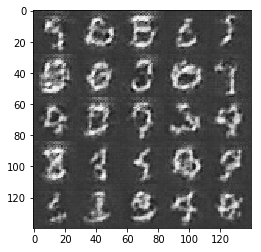

Epoch 1/2... Batch 710  Discriminator Loss: 1.3815... Generator Loss: 0.4380
Epoch 1/2... Batch 720  Discriminator Loss: 1.2250... Generator Loss: 0.6391
Epoch 1/2... Batch 730  Discriminator Loss: 0.8954... Generator Loss: 0.7204
Epoch 1/2... Batch 740  Discriminator Loss: 0.3207... Generator Loss: 2.0692
Epoch 1/2... Batch 750  Discriminator Loss: 0.5293... Generator Loss: 1.7589
Epoch 1/2... Batch 760  Discriminator Loss: 0.3459... Generator Loss: 1.8529
Epoch 1/2... Batch 770  Discriminator Loss: 0.5078... Generator Loss: 1.3054
Epoch 1/2... Batch 780  Discriminator Loss: 0.8457... Generator Loss: 3.4609
Epoch 1/2... Batch 790  Discriminator Loss: 0.3346... Generator Loss: 2.1758
Epoch 1/2... Batch 800  Discriminator Loss: 0.4110... Generator Loss: 1.4060


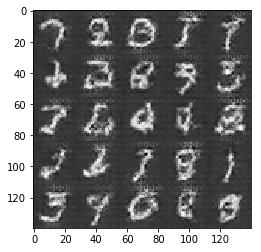

Epoch 1/2... Batch 810  Discriminator Loss: 0.3627... Generator Loss: 1.9862
Epoch 1/2... Batch 820  Discriminator Loss: 0.5163... Generator Loss: 1.4561
Epoch 1/2... Batch 830  Discriminator Loss: 0.3064... Generator Loss: 4.7086
Epoch 1/2... Batch 840  Discriminator Loss: 0.0754... Generator Loss: 4.2788
Epoch 1/2... Batch 850  Discriminator Loss: 0.4106... Generator Loss: 1.7239
Epoch 1/2... Batch 860  Discriminator Loss: 0.5112... Generator Loss: 2.1484
Epoch 1/2... Batch 870  Discriminator Loss: 1.5485... Generator Loss: 0.7708
Epoch 1/2... Batch 880  Discriminator Loss: 1.5723... Generator Loss: 1.3324
Epoch 1/2... Batch 890  Discriminator Loss: 1.4668... Generator Loss: 1.1476
Epoch 1/2... Batch 900  Discriminator Loss: 0.8484... Generator Loss: 0.9941


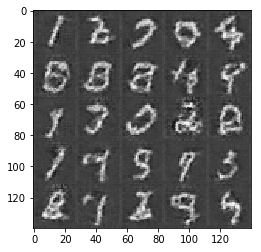

Epoch 1/2... Batch 910  Discriminator Loss: 1.9650... Generator Loss: 0.3078
Epoch 1/2... Batch 920  Discriminator Loss: 0.4405... Generator Loss: 2.8248
Epoch 1/2... Batch 930  Discriminator Loss: 0.9556... Generator Loss: 0.8530
Epoch 2/2... Batch 10  Discriminator Loss: 0.9009... Generator Loss: 0.6698
Epoch 2/2... Batch 20  Discriminator Loss: 0.5287... Generator Loss: 1.5787
Epoch 2/2... Batch 30  Discriminator Loss: 0.7207... Generator Loss: 4.8656
Epoch 2/2... Batch 40  Discriminator Loss: 0.4123... Generator Loss: 2.8104
Epoch 2/2... Batch 50  Discriminator Loss: 0.6953... Generator Loss: 5.4158
Epoch 2/2... Batch 60  Discriminator Loss: 0.5040... Generator Loss: 2.1461
Epoch 2/2... Batch 70  Discriminator Loss: 0.4306... Generator Loss: 1.8145
Epoch 2/2... Batch 80  Discriminator Loss: 0.4656... Generator Loss: 1.4527
Epoch 2/2... Batch 90  Discriminator Loss: 0.0500... Generator Loss: 5.6189
Epoch 2/2... Batch 100  Discriminator Loss: 0.3663... Generator Loss: 5.1776


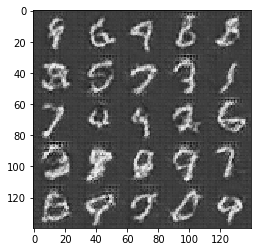

Epoch 2/2... Batch 110  Discriminator Loss: 0.1685... Generator Loss: 3.0515
Epoch 2/2... Batch 120  Discriminator Loss: 0.1200... Generator Loss: 3.4172
Epoch 2/2... Batch 130  Discriminator Loss: 0.0604... Generator Loss: 4.0749
Epoch 2/2... Batch 140  Discriminator Loss: 0.2914... Generator Loss: 1.8738
Epoch 2/2... Batch 150  Discriminator Loss: 0.1528... Generator Loss: 2.9073
Epoch 2/2... Batch 160  Discriminator Loss: 0.1250... Generator Loss: 3.7159
Epoch 2/2... Batch 170  Discriminator Loss: 2.5885... Generator Loss: 0.1662
Epoch 2/2... Batch 180  Discriminator Loss: 0.7131... Generator Loss: 5.2677
Epoch 2/2... Batch 190  Discriminator Loss: 0.6350... Generator Loss: 1.0615
Epoch 2/2... Batch 200  Discriminator Loss: 0.4739... Generator Loss: 1.5765


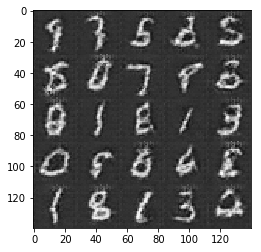

Epoch 2/2... Batch 210  Discriminator Loss: 0.2051... Generator Loss: 4.7285
Epoch 2/2... Batch 220  Discriminator Loss: 0.2564... Generator Loss: 2.4495
Epoch 2/2... Batch 230  Discriminator Loss: 0.0914... Generator Loss: 3.6607
Epoch 2/2... Batch 240  Discriminator Loss: 0.1667... Generator Loss: 2.9182
Epoch 2/2... Batch 250  Discriminator Loss: 0.0748... Generator Loss: 5.1776
Epoch 2/2... Batch 260  Discriminator Loss: 2.2813... Generator Loss: 0.2590
Epoch 2/2... Batch 270  Discriminator Loss: 0.7261... Generator Loss: 1.1854
Epoch 2/2... Batch 280  Discriminator Loss: 0.7204... Generator Loss: 1.2104
Epoch 2/2... Batch 290  Discriminator Loss: 0.2659... Generator Loss: 3.5182
Epoch 2/2... Batch 300  Discriminator Loss: 0.5174... Generator Loss: 1.3514


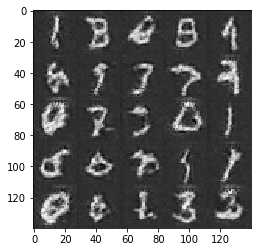

Epoch 2/2... Batch 310  Discriminator Loss: 0.3553... Generator Loss: 2.0555
Epoch 2/2... Batch 320  Discriminator Loss: 0.6198... Generator Loss: 4.0113
Epoch 2/2... Batch 330  Discriminator Loss: 0.4378... Generator Loss: 1.8362
Epoch 2/2... Batch 340  Discriminator Loss: 0.4440... Generator Loss: 1.8654
Epoch 2/2... Batch 350  Discriminator Loss: 0.0638... Generator Loss: 4.9951
Epoch 2/2... Batch 360  Discriminator Loss: 0.3375... Generator Loss: 1.6914
Epoch 2/2... Batch 370  Discriminator Loss: 0.1096... Generator Loss: 3.2382
Epoch 2/2... Batch 380  Discriminator Loss: 0.0915... Generator Loss: 5.6124
Epoch 2/2... Batch 390  Discriminator Loss: 0.6823... Generator Loss: 2.8744
Epoch 2/2... Batch 400  Discriminator Loss: 1.3154... Generator Loss: 0.6913


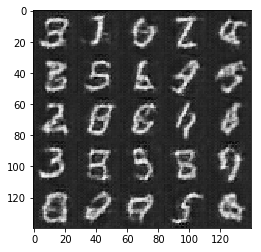

Epoch 2/2... Batch 410  Discriminator Loss: 1.6154... Generator Loss: 0.3855
Epoch 2/2... Batch 420  Discriminator Loss: 1.0725... Generator Loss: 0.9389
Epoch 2/2... Batch 430  Discriminator Loss: 1.3081... Generator Loss: 1.9337
Epoch 2/2... Batch 440  Discriminator Loss: 0.8165... Generator Loss: 1.1759
Epoch 2/2... Batch 450  Discriminator Loss: 1.1307... Generator Loss: 0.8392
Epoch 2/2... Batch 460  Discriminator Loss: 1.0674... Generator Loss: 0.8695
Epoch 2/2... Batch 470  Discriminator Loss: 1.4449... Generator Loss: 0.4763
Epoch 2/2... Batch 480  Discriminator Loss: 0.6219... Generator Loss: 1.3941
Epoch 2/2... Batch 490  Discriminator Loss: 0.4799... Generator Loss: 2.8446
Epoch 2/2... Batch 500  Discriminator Loss: 0.3594... Generator Loss: 1.7786


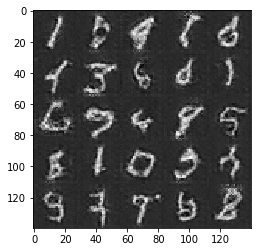

Epoch 2/2... Batch 510  Discriminator Loss: 1.4219... Generator Loss: 4.4939
Epoch 2/2... Batch 520  Discriminator Loss: 1.0021... Generator Loss: 0.9336
Epoch 2/2... Batch 530  Discriminator Loss: 0.5320... Generator Loss: 3.2385
Epoch 2/2... Batch 540  Discriminator Loss: 0.3216... Generator Loss: 2.1191
Epoch 2/2... Batch 550  Discriminator Loss: 0.1746... Generator Loss: 3.0692
Epoch 2/2... Batch 560  Discriminator Loss: 1.2054... Generator Loss: 0.7301
Epoch 2/2... Batch 570  Discriminator Loss: 0.7360... Generator Loss: 2.8659
Epoch 2/2... Batch 580  Discriminator Loss: 0.2659... Generator Loss: 3.6307
Epoch 2/2... Batch 590  Discriminator Loss: 0.2230... Generator Loss: 2.6254
Epoch 2/2... Batch 600  Discriminator Loss: 0.3165... Generator Loss: 2.0690


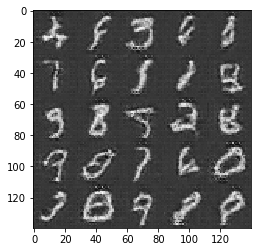

Epoch 2/2... Batch 610  Discriminator Loss: 0.3225... Generator Loss: 1.9390
Epoch 2/2... Batch 620  Discriminator Loss: 0.0488... Generator Loss: 5.1371
Epoch 2/2... Batch 630  Discriminator Loss: 3.0160... Generator Loss: 0.1225
Epoch 2/2... Batch 640  Discriminator Loss: 0.3857... Generator Loss: 4.8153
Epoch 2/2... Batch 650  Discriminator Loss: 0.8324... Generator Loss: 0.9057
Epoch 2/2... Batch 660  Discriminator Loss: 0.1798... Generator Loss: 3.4747
Epoch 2/2... Batch 670  Discriminator Loss: 0.3836... Generator Loss: 1.9547
Epoch 2/2... Batch 680  Discriminator Loss: 0.5049... Generator Loss: 1.2816
Epoch 2/2... Batch 690  Discriminator Loss: 0.1312... Generator Loss: 4.6271
Epoch 2/2... Batch 700  Discriminator Loss: 0.4313... Generator Loss: 1.9081


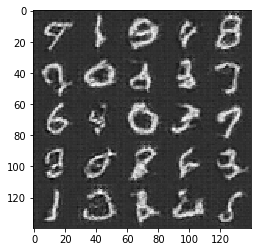

Epoch 2/2... Batch 710  Discriminator Loss: 0.3795... Generator Loss: 1.4269
Epoch 2/2... Batch 720  Discriminator Loss: 1.3888... Generator Loss: 0.4564
Epoch 2/2... Batch 730  Discriminator Loss: 0.0726... Generator Loss: 6.0826
Epoch 2/2... Batch 740  Discriminator Loss: 3.0154... Generator Loss: 0.1546
Epoch 2/2... Batch 750  Discriminator Loss: 0.7218... Generator Loss: 2.4038
Epoch 2/2... Batch 760  Discriminator Loss: 0.9616... Generator Loss: 1.0479
Epoch 2/2... Batch 770  Discriminator Loss: 0.2354... Generator Loss: 5.2845
Epoch 2/2... Batch 780  Discriminator Loss: 0.3955... Generator Loss: 1.7093
Epoch 2/2... Batch 790  Discriminator Loss: 0.3554... Generator Loss: 1.6107
Epoch 2/2... Batch 800  Discriminator Loss: 0.5051... Generator Loss: 1.3963


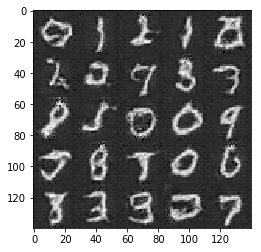

Epoch 2/2... Batch 810  Discriminator Loss: 0.2475... Generator Loss: 2.5630
Epoch 2/2... Batch 820  Discriminator Loss: 0.4960... Generator Loss: 1.2932
Epoch 2/2... Batch 830  Discriminator Loss: 1.3014... Generator Loss: 7.1387
Epoch 2/2... Batch 840  Discriminator Loss: 1.8240... Generator Loss: 0.5275
Epoch 2/2... Batch 850  Discriminator Loss: 0.8840... Generator Loss: 1.1078
Epoch 2/2... Batch 860  Discriminator Loss: 1.7702... Generator Loss: 0.5090
Epoch 2/2... Batch 870  Discriminator Loss: 0.9351... Generator Loss: 1.2767
Epoch 2/2... Batch 880  Discriminator Loss: 0.7258... Generator Loss: 1.1975
Epoch 2/2... Batch 890  Discriminator Loss: 0.4593... Generator Loss: 1.4797
Epoch 2/2... Batch 900  Discriminator Loss: 0.5388... Generator Loss: 1.4185


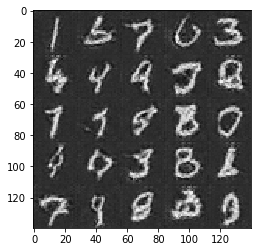

Epoch 2/2... Batch 910  Discriminator Loss: 0.5480... Generator Loss: 2.2059
Epoch 2/2... Batch 920  Discriminator Loss: 0.9567... Generator Loss: 1.8567
Epoch 2/2... Batch 930  Discriminator Loss: 0.8507... Generator Loss: 1.3395


In [92]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### 调参记录

初始参数：
* batch_size = 64
* z_dim = 100
* learning_rate = 0.001
* beta1 = 0.5

模型架构（filter =5, stride = 1 or 2）：
* Discriminator：28x28x1 ---> 14x14x64 ---> 7x7x256 ---> 7x7x512
* Generator: 7x7x512 ---> 7x7x256 ---> 14x14x64 ---> 28x28x1

第一次结果：Discriminator Loss: 0.8251... Generator Loss: 0.9614 效果不是很好，基本形状出来了，但是图片灰蒙蒙的

调整beta1：
* 0.3 ---> Discriminator Loss: 0.8399... Generator Loss: 0.8489 与0.5的结果接近
* 0.1 ---> Discriminator Loss: 2.1238... Generator Loss: 3.7789 非常糟糕

调整结构：减小辨别器的大小
* Discriminator：28x28x1 ---> 14x14x64 ---> 7x7x128 ---> 7x7x256
* 保持初始参数 --->  Discriminator Loss: 1.6704... Generator Loss: 0.2734 
* 辨别器的loss从一开始就比生成器的loss就来得大，不太合理，感觉互换了竞争地位，还是换回之前的模型结构

调整学习率：
* 0.005 ---> Discriminator Loss: 1.1054... Generator Loss: 1.7795
* 0.0005 ---> Discriminator Loss: 0.9000... Generator Loss: 0.6375
* 0.0001 ---> Discriminator Loss: 0.6731... Generator Loss: 0.9542

z_dim：
* 128 ---> Batch 930  Discriminator Loss: 0.1254... Generator Loss: 2.7208 糟糕
* 增加z_dim会更多的增加noise信息

加入dropout感觉提升也不大 Discriminator Loss: 1.1555... Generator Loss: 0.8900

尝试增加迭代次数到3

感觉差别也不大 Discriminator Loss: 0.6617... Generator Loss: 1.0947

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/2... Batch 10  Discriminator Loss: 1.6727... Generator Loss: 1.3211
Epoch 1/2... Batch 20  Discriminator Loss: 1.5504... Generator Loss: 2.9627
Epoch 1/2... Batch 30  Discriminator Loss: 1.6160... Generator Loss: 0.8108
Epoch 1/2... Batch 40  Discriminator Loss: 0.8716... Generator Loss: 1.3289
Epoch 1/2... Batch 50  Discriminator Loss: 0.6843... Generator Loss: 3.2571
Epoch 1/2... Batch 60  Discriminator Loss: 1.6238... Generator Loss: 8.7089
Epoch 1/2... Batch 70  Discriminator Loss: 0.7968... Generator Loss: 7.1825
Epoch 1/2... Batch 80  Discriminator Loss: 0.1370... Generator Loss: 6.8933
Epoch 1/2... Batch 90  Discriminator Loss: 0.3340... Generator Loss: 1.7847
Epoch 1/2... Batch 100  Discriminator Loss: 0.0598... Generator Loss: 5.1199


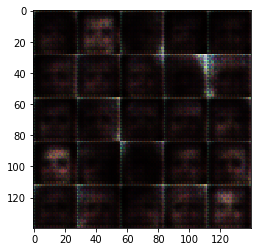

Epoch 1/2... Batch 110  Discriminator Loss: 0.5089... Generator Loss: 1.3965
Epoch 1/2... Batch 120  Discriminator Loss: 0.4996... Generator Loss: 2.0406
Epoch 1/2... Batch 130  Discriminator Loss: 5.0962... Generator Loss: 0.0619
Epoch 1/2... Batch 140  Discriminator Loss: 0.2734... Generator Loss: 3.3554
Epoch 1/2... Batch 150  Discriminator Loss: 0.3645... Generator Loss: 3.4411
Epoch 1/2... Batch 160  Discriminator Loss: 0.5170... Generator Loss: 2.6715
Epoch 1/2... Batch 170  Discriminator Loss: 0.3700... Generator Loss: 5.0299
Epoch 1/2... Batch 180  Discriminator Loss: 0.7909... Generator Loss: 1.1748
Epoch 1/2... Batch 190  Discriminator Loss: 1.1586... Generator Loss: 1.9455
Epoch 1/2... Batch 200  Discriminator Loss: 0.2239... Generator Loss: 2.7721


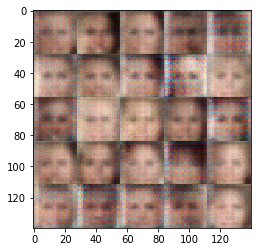

Epoch 1/2... Batch 210  Discriminator Loss: 0.4328... Generator Loss: 5.8598
Epoch 1/2... Batch 220  Discriminator Loss: 1.2197... Generator Loss: 1.9076
Epoch 1/2... Batch 230  Discriminator Loss: 0.3999... Generator Loss: 3.1600
Epoch 1/2... Batch 240  Discriminator Loss: 1.1217... Generator Loss: 8.2464
Epoch 1/2... Batch 250  Discriminator Loss: 0.6678... Generator Loss: 1.3357
Epoch 1/2... Batch 260  Discriminator Loss: 0.8345... Generator Loss: 1.0431
Epoch 1/2... Batch 270  Discriminator Loss: 1.2274... Generator Loss: 1.1641
Epoch 1/2... Batch 280  Discriminator Loss: 0.5580... Generator Loss: 1.9765
Epoch 1/2... Batch 290  Discriminator Loss: 1.2080... Generator Loss: 0.4419
Epoch 1/2... Batch 300  Discriminator Loss: 0.3783... Generator Loss: 2.7847


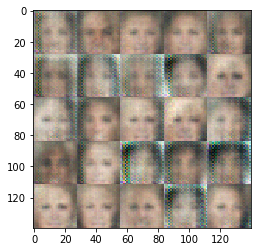

Epoch 1/2... Batch 310  Discriminator Loss: 1.8291... Generator Loss: 0.4668
Epoch 1/2... Batch 320  Discriminator Loss: 0.1689... Generator Loss: 3.6498
Epoch 1/2... Batch 330  Discriminator Loss: 0.8319... Generator Loss: 0.8815
Epoch 1/2... Batch 340  Discriminator Loss: 1.5673... Generator Loss: 3.6819
Epoch 1/2... Batch 350  Discriminator Loss: 1.3090... Generator Loss: 0.6076
Epoch 1/2... Batch 360  Discriminator Loss: 1.8486... Generator Loss: 0.3558
Epoch 1/2... Batch 370  Discriminator Loss: 0.1699... Generator Loss: 5.4512
Epoch 1/2... Batch 380  Discriminator Loss: 2.2691... Generator Loss: 0.4507
Epoch 1/2... Batch 390  Discriminator Loss: 1.1951... Generator Loss: 1.1890
Epoch 1/2... Batch 400  Discriminator Loss: 0.3813... Generator Loss: 2.9623


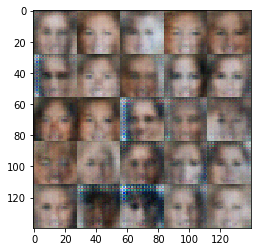

Epoch 1/2... Batch 410  Discriminator Loss: 1.2201... Generator Loss: 0.9637
Epoch 1/2... Batch 420  Discriminator Loss: 0.9150... Generator Loss: 1.6081
Epoch 1/2... Batch 430  Discriminator Loss: 0.6324... Generator Loss: 6.9860
Epoch 1/2... Batch 440  Discriminator Loss: 2.5028... Generator Loss: 0.1340
Epoch 1/2... Batch 450  Discriminator Loss: 1.6230... Generator Loss: 0.3665
Epoch 1/2... Batch 460  Discriminator Loss: 0.9470... Generator Loss: 0.9932
Epoch 1/2... Batch 470  Discriminator Loss: 1.0322... Generator Loss: 0.7167
Epoch 1/2... Batch 480  Discriminator Loss: 2.3046... Generator Loss: 0.1930
Epoch 1/2... Batch 490  Discriminator Loss: 0.8333... Generator Loss: 2.6962
Epoch 1/2... Batch 500  Discriminator Loss: 1.0665... Generator Loss: 0.7005


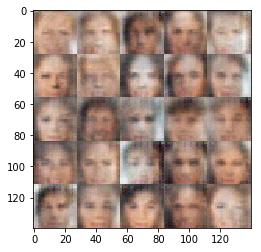

Epoch 1/2... Batch 510  Discriminator Loss: 0.5920... Generator Loss: 4.8008
Epoch 1/2... Batch 520  Discriminator Loss: 2.0095... Generator Loss: 0.2098
Epoch 1/2... Batch 530  Discriminator Loss: 2.2444... Generator Loss: 0.2267
Epoch 1/2... Batch 540  Discriminator Loss: 1.9138... Generator Loss: 0.2246
Epoch 1/2... Batch 550  Discriminator Loss: 0.3627... Generator Loss: 2.0414
Epoch 1/2... Batch 560  Discriminator Loss: 2.1085... Generator Loss: 0.2074
Epoch 1/2... Batch 570  Discriminator Loss: 1.4086... Generator Loss: 0.4523
Epoch 1/2... Batch 580  Discriminator Loss: 1.6005... Generator Loss: 5.0586
Epoch 1/2... Batch 590  Discriminator Loss: 3.2498... Generator Loss: 0.0551
Epoch 1/2... Batch 600  Discriminator Loss: 1.6761... Generator Loss: 3.4817


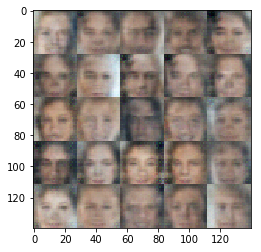

Epoch 1/2... Batch 610  Discriminator Loss: 0.4407... Generator Loss: 7.9510
Epoch 1/2... Batch 620  Discriminator Loss: 1.0167... Generator Loss: 0.7138
Epoch 1/2... Batch 630  Discriminator Loss: 0.4219... Generator Loss: 5.2561
Epoch 1/2... Batch 640  Discriminator Loss: 0.4607... Generator Loss: 1.6731
Epoch 1/2... Batch 650  Discriminator Loss: 2.0764... Generator Loss: 0.1943
Epoch 1/2... Batch 660  Discriminator Loss: 0.5861... Generator Loss: 5.7429
Epoch 1/2... Batch 670  Discriminator Loss: 0.2443... Generator Loss: 2.3683
Epoch 1/2... Batch 680  Discriminator Loss: 0.4047... Generator Loss: 3.4188
Epoch 1/2... Batch 690  Discriminator Loss: 1.0217... Generator Loss: 0.6856
Epoch 1/2... Batch 700  Discriminator Loss: 0.5541... Generator Loss: 4.0053


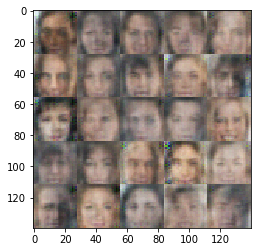

Epoch 1/2... Batch 710  Discriminator Loss: 0.0968... Generator Loss: 8.9206
Epoch 1/2... Batch 720  Discriminator Loss: 0.3244... Generator Loss: 2.5676
Epoch 1/2... Batch 730  Discriminator Loss: 0.6216... Generator Loss: 7.9689
Epoch 1/2... Batch 740  Discriminator Loss: 0.3672... Generator Loss: 2.0560
Epoch 1/2... Batch 750  Discriminator Loss: 0.0440... Generator Loss: 5.7139
Epoch 1/2... Batch 760  Discriminator Loss: 0.0833... Generator Loss: 4.5873
Epoch 1/2... Batch 770  Discriminator Loss: 2.6257... Generator Loss: 5.5111
Epoch 1/2... Batch 780  Discriminator Loss: 1.2124... Generator Loss: 0.6794
Epoch 1/2... Batch 790  Discriminator Loss: 0.9596... Generator Loss: 0.9483
Epoch 1/2... Batch 800  Discriminator Loss: 1.8670... Generator Loss: 0.2884


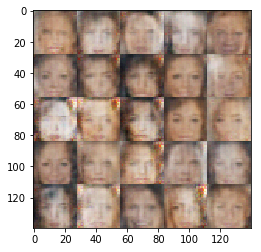

Epoch 1/2... Batch 810  Discriminator Loss: 0.3289... Generator Loss: 1.9024
Epoch 1/2... Batch 820  Discriminator Loss: 0.2033... Generator Loss: 2.7812
Epoch 1/2... Batch 830  Discriminator Loss: 1.4849... Generator Loss: 11.7475
Epoch 1/2... Batch 840  Discriminator Loss: 0.6818... Generator Loss: 2.4471
Epoch 1/2... Batch 850  Discriminator Loss: 1.5352... Generator Loss: 0.4217
Epoch 1/2... Batch 860  Discriminator Loss: 0.2006... Generator Loss: 2.7521
Epoch 1/2... Batch 870  Discriminator Loss: 1.4044... Generator Loss: 0.4165
Epoch 1/2... Batch 880  Discriminator Loss: 1.0725... Generator Loss: 0.6920
Epoch 1/2... Batch 890  Discriminator Loss: 1.3760... Generator Loss: 0.4777
Epoch 1/2... Batch 900  Discriminator Loss: 0.8955... Generator Loss: 0.9669


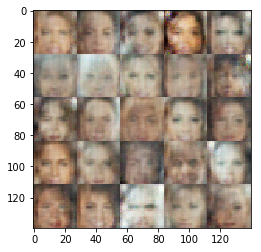

Epoch 1/2... Batch 910  Discriminator Loss: 0.9928... Generator Loss: 0.9505
Epoch 1/2... Batch 920  Discriminator Loss: 0.7114... Generator Loss: 2.7253
Epoch 1/2... Batch 930  Discriminator Loss: 0.3258... Generator Loss: 12.5613
Epoch 1/2... Batch 940  Discriminator Loss: 0.0484... Generator Loss: 5.1020
Epoch 1/2... Batch 950  Discriminator Loss: 1.2625... Generator Loss: 0.6767
Epoch 1/2... Batch 960  Discriminator Loss: 1.7638... Generator Loss: 7.4572
Epoch 1/2... Batch 970  Discriminator Loss: 2.0635... Generator Loss: 0.2410
Epoch 1/2... Batch 980  Discriminator Loss: 0.5669... Generator Loss: 1.1935
Epoch 1/2... Batch 990  Discriminator Loss: 0.8840... Generator Loss: 4.9685
Epoch 1/2... Batch 1000  Discriminator Loss: 0.0266... Generator Loss: 6.3681


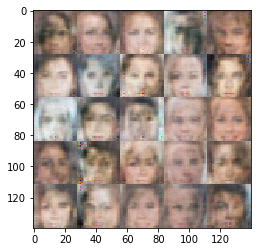

Epoch 1/2... Batch 1010  Discriminator Loss: 0.8204... Generator Loss: 1.1489
Epoch 1/2... Batch 1020  Discriminator Loss: 1.0114... Generator Loss: 1.9792
Epoch 1/2... Batch 1030  Discriminator Loss: 0.3410... Generator Loss: 11.2645
Epoch 1/2... Batch 1040  Discriminator Loss: 0.1091... Generator Loss: 3.6899
Epoch 1/2... Batch 1050  Discriminator Loss: 1.8997... Generator Loss: 5.0661
Epoch 1/2... Batch 1060  Discriminator Loss: 0.5961... Generator Loss: 1.3688
Epoch 1/2... Batch 1070  Discriminator Loss: 0.1924... Generator Loss: 8.7010
Epoch 1/2... Batch 1080  Discriminator Loss: 0.2406... Generator Loss: 2.8175
Epoch 1/2... Batch 1090  Discriminator Loss: 4.6320... Generator Loss: 0.0426
Epoch 1/2... Batch 1100  Discriminator Loss: 1.5305... Generator Loss: 0.7932


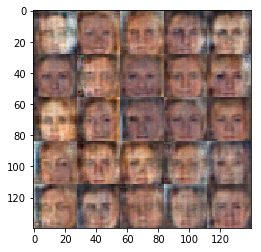

Epoch 1/2... Batch 1110  Discriminator Loss: 1.8454... Generator Loss: 0.6082
Epoch 1/2... Batch 1120  Discriminator Loss: 1.3530... Generator Loss: 0.7715
Epoch 1/2... Batch 1130  Discriminator Loss: 1.6627... Generator Loss: 0.6952
Epoch 1/2... Batch 1140  Discriminator Loss: 1.5257... Generator Loss: 0.7264
Epoch 1/2... Batch 1150  Discriminator Loss: 1.5561... Generator Loss: 0.6605
Epoch 1/2... Batch 1160  Discriminator Loss: 1.4919... Generator Loss: 0.6637
Epoch 1/2... Batch 1170  Discriminator Loss: 1.4222... Generator Loss: 0.6441
Epoch 1/2... Batch 1180  Discriminator Loss: 1.3279... Generator Loss: 0.7409
Epoch 1/2... Batch 1190  Discriminator Loss: 1.4952... Generator Loss: 0.8245
Epoch 1/2... Batch 1200  Discriminator Loss: 1.2701... Generator Loss: 1.0439


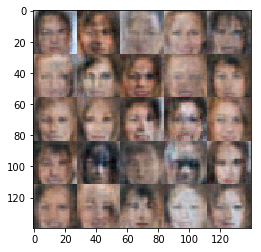

Epoch 1/2... Batch 1210  Discriminator Loss: 1.3614... Generator Loss: 0.5418
Epoch 1/2... Batch 1220  Discriminator Loss: 0.6389... Generator Loss: 3.1845
Epoch 1/2... Batch 1230  Discriminator Loss: 0.8377... Generator Loss: 4.0889
Epoch 1/2... Batch 1240  Discriminator Loss: 0.1237... Generator Loss: 4.6548
Epoch 1/2... Batch 1250  Discriminator Loss: 0.1533... Generator Loss: 4.1835
Epoch 1/2... Batch 1260  Discriminator Loss: 0.5124... Generator Loss: 1.7820
Epoch 1/2... Batch 1270  Discriminator Loss: 0.5555... Generator Loss: 1.5590
Epoch 1/2... Batch 1280  Discriminator Loss: 0.1918... Generator Loss: 2.5405
Epoch 1/2... Batch 1290  Discriminator Loss: 2.0357... Generator Loss: 4.7778
Epoch 1/2... Batch 1300  Discriminator Loss: 1.0136... Generator Loss: 3.6686


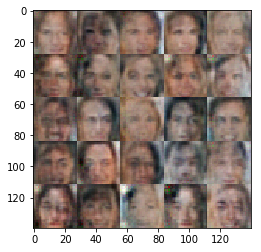

Epoch 1/2... Batch 1310  Discriminator Loss: 0.1381... Generator Loss: 2.7309
Epoch 1/2... Batch 1320  Discriminator Loss: 0.3824... Generator Loss: 4.9943
Epoch 1/2... Batch 1330  Discriminator Loss: 0.0754... Generator Loss: 11.0114
Epoch 1/2... Batch 1340  Discriminator Loss: 2.6229... Generator Loss: 0.2896
Epoch 1/2... Batch 1350  Discriminator Loss: 1.5085... Generator Loss: 0.5944
Epoch 1/2... Batch 1360  Discriminator Loss: 1.1857... Generator Loss: 0.9326
Epoch 1/2... Batch 1370  Discriminator Loss: 0.5086... Generator Loss: 2.5602
Epoch 1/2... Batch 1380  Discriminator Loss: 0.6168... Generator Loss: 1.2233
Epoch 1/2... Batch 1390  Discriminator Loss: 0.2268... Generator Loss: 2.7273
Epoch 1/2... Batch 1400  Discriminator Loss: 0.0680... Generator Loss: 5.2760


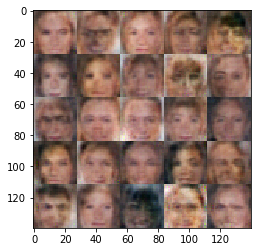

Epoch 1/2... Batch 1410  Discriminator Loss: 0.8492... Generator Loss: 2.7836
Epoch 1/2... Batch 1420  Discriminator Loss: 1.2705... Generator Loss: 3.5021
Epoch 1/2... Batch 1430  Discriminator Loss: 1.0559... Generator Loss: 4.3570
Epoch 1/2... Batch 1440  Discriminator Loss: 1.7842... Generator Loss: 9.3376
Epoch 1/2... Batch 1450  Discriminator Loss: 0.8025... Generator Loss: 1.2463
Epoch 1/2... Batch 1460  Discriminator Loss: 0.1111... Generator Loss: 5.4093
Epoch 1/2... Batch 1470  Discriminator Loss: 0.0137... Generator Loss: 9.9096
Epoch 1/2... Batch 1480  Discriminator Loss: 0.1430... Generator Loss: 7.4668
Epoch 1/2... Batch 1490  Discriminator Loss: 0.7301... Generator Loss: 8.9042
Epoch 1/2... Batch 1500  Discriminator Loss: 0.0227... Generator Loss: 5.4439


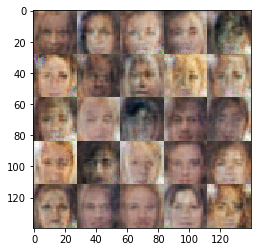

Epoch 1/2... Batch 1510  Discriminator Loss: 3.7326... Generator Loss: 0.1072
Epoch 1/2... Batch 1520  Discriminator Loss: 1.5424... Generator Loss: 0.4533
Epoch 1/2... Batch 1530  Discriminator Loss: 1.3099... Generator Loss: 0.8234
Epoch 1/2... Batch 1540  Discriminator Loss: 1.2028... Generator Loss: 1.1876
Epoch 1/2... Batch 1550  Discriminator Loss: 0.8078... Generator Loss: 4.6539
Epoch 1/2... Batch 1560  Discriminator Loss: 0.4654... Generator Loss: 1.5851
Epoch 1/2... Batch 1570  Discriminator Loss: 0.3164... Generator Loss: 4.2391
Epoch 1/2... Batch 1580  Discriminator Loss: 0.7372... Generator Loss: 1.0719
Epoch 1/2... Batch 1590  Discriminator Loss: 0.0805... Generator Loss: 4.7709
Epoch 1/2... Batch 1600  Discriminator Loss: 0.0660... Generator Loss: 3.7985


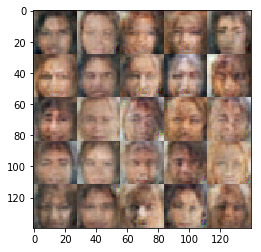

Epoch 1/2... Batch 1610  Discriminator Loss: 0.0245... Generator Loss: 4.4934
Epoch 1/2... Batch 1620  Discriminator Loss: 0.0179... Generator Loss: 9.0570
Epoch 1/2... Batch 1630  Discriminator Loss: 0.0425... Generator Loss: 3.5493
Epoch 1/2... Batch 1640  Discriminator Loss: 0.0838... Generator Loss: 4.3801
Epoch 1/2... Batch 1650  Discriminator Loss: 0.0211... Generator Loss: 8.3499
Epoch 1/2... Batch 1660  Discriminator Loss: 2.0000... Generator Loss: 3.2950
Epoch 1/2... Batch 1670  Discriminator Loss: 0.9325... Generator Loss: 1.3491
Epoch 1/2... Batch 1680  Discriminator Loss: 0.8533... Generator Loss: 0.9521
Epoch 1/2... Batch 1690  Discriminator Loss: 1.1372... Generator Loss: 0.9140
Epoch 1/2... Batch 1700  Discriminator Loss: 1.0465... Generator Loss: 1.2590


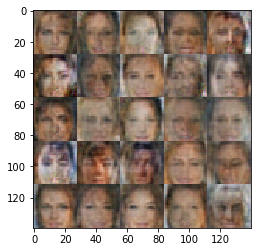

Epoch 1/2... Batch 1710  Discriminator Loss: 0.4226... Generator Loss: 2.7681
Epoch 1/2... Batch 1720  Discriminator Loss: 0.2726... Generator Loss: 3.1901
Epoch 1/2... Batch 1730  Discriminator Loss: 0.8357... Generator Loss: 0.9584
Epoch 1/2... Batch 1740  Discriminator Loss: 0.8504... Generator Loss: 2.7581
Epoch 1/2... Batch 1750  Discriminator Loss: 0.2746... Generator Loss: 2.7225
Epoch 1/2... Batch 1760  Discriminator Loss: 0.1687... Generator Loss: 9.1826
Epoch 1/2... Batch 1770  Discriminator Loss: 0.7723... Generator Loss: 1.0452
Epoch 1/2... Batch 1780  Discriminator Loss: 2.6055... Generator Loss: 0.1570
Epoch 1/2... Batch 1790  Discriminator Loss: 0.0765... Generator Loss: 4.7546
Epoch 1/2... Batch 1800  Discriminator Loss: 0.0758... Generator Loss: 4.3530


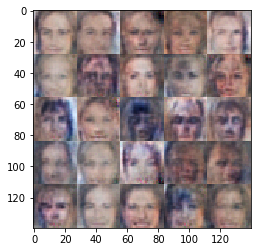

Epoch 1/2... Batch 1810  Discriminator Loss: 1.3934... Generator Loss: 0.5590
Epoch 1/2... Batch 1820  Discriminator Loss: 0.1927... Generator Loss: 3.0666
Epoch 1/2... Batch 1830  Discriminator Loss: 0.3418... Generator Loss: 4.6164
Epoch 1/2... Batch 1840  Discriminator Loss: 0.0609... Generator Loss: 5.2559
Epoch 1/2... Batch 1850  Discriminator Loss: 0.7925... Generator Loss: 5.9585
Epoch 1/2... Batch 1860  Discriminator Loss: 0.0511... Generator Loss: 11.7985
Epoch 1/2... Batch 1870  Discriminator Loss: 0.0500... Generator Loss: 7.7346
Epoch 1/2... Batch 1880  Discriminator Loss: 0.0939... Generator Loss: 5.9067
Epoch 1/2... Batch 1890  Discriminator Loss: 0.0283... Generator Loss: 6.0348
Epoch 1/2... Batch 1900  Discriminator Loss: 0.0299... Generator Loss: 6.3383


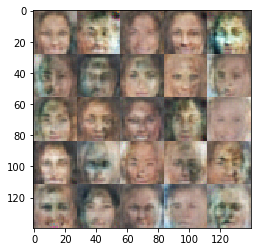

Epoch 1/2... Batch 1910  Discriminator Loss: 1.4902... Generator Loss: 0.7786
Epoch 1/2... Batch 1920  Discriminator Loss: 0.0962... Generator Loss: 4.5571
Epoch 1/2... Batch 1930  Discriminator Loss: 1.4070... Generator Loss: 0.4860
Epoch 1/2... Batch 1940  Discriminator Loss: 0.3701... Generator Loss: 2.2849
Epoch 1/2... Batch 1950  Discriminator Loss: 1.2160... Generator Loss: 2.0121
Epoch 1/2... Batch 1960  Discriminator Loss: 0.0544... Generator Loss: 11.4489
Epoch 1/2... Batch 1970  Discriminator Loss: 0.0237... Generator Loss: 6.4797
Epoch 1/2... Batch 1980  Discriminator Loss: 0.2280... Generator Loss: 11.2607
Epoch 1/2... Batch 1990  Discriminator Loss: 0.0496... Generator Loss: 8.1231
Epoch 1/2... Batch 2000  Discriminator Loss: 2.8614... Generator Loss: 0.3375


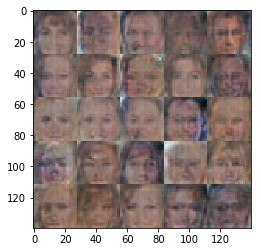

Epoch 1/2... Batch 2010  Discriminator Loss: 1.7589... Generator Loss: 0.5333
Epoch 1/2... Batch 2020  Discriminator Loss: 1.5933... Generator Loss: 0.6954
Epoch 1/2... Batch 2030  Discriminator Loss: 1.5282... Generator Loss: 0.7016
Epoch 1/2... Batch 2040  Discriminator Loss: 1.5263... Generator Loss: 0.6195
Epoch 1/2... Batch 2050  Discriminator Loss: 1.5375... Generator Loss: 0.7090
Epoch 1/2... Batch 2060  Discriminator Loss: 1.6942... Generator Loss: 0.6391
Epoch 1/2... Batch 2070  Discriminator Loss: 1.4839... Generator Loss: 0.6626
Epoch 1/2... Batch 2080  Discriminator Loss: 1.6065... Generator Loss: 0.6882
Epoch 1/2... Batch 2090  Discriminator Loss: 1.4757... Generator Loss: 0.6753
Epoch 1/2... Batch 2100  Discriminator Loss: 1.9120... Generator Loss: 0.2936


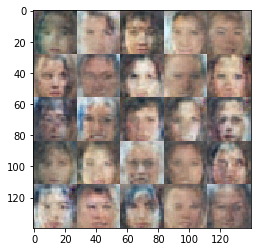

Epoch 1/2... Batch 2110  Discriminator Loss: 0.2150... Generator Loss: 7.6678
Epoch 1/2... Batch 2120  Discriminator Loss: 0.7116... Generator Loss: 2.5944
Epoch 1/2... Batch 2130  Discriminator Loss: 1.4815... Generator Loss: 0.9444
Epoch 1/2... Batch 2140  Discriminator Loss: 0.6187... Generator Loss: 1.7420
Epoch 1/2... Batch 2150  Discriminator Loss: 0.4332... Generator Loss: 3.4742
Epoch 1/2... Batch 2160  Discriminator Loss: 0.1809... Generator Loss: 11.2240
Epoch 1/2... Batch 2170  Discriminator Loss: 0.3004... Generator Loss: 2.8021
Epoch 1/2... Batch 2180  Discriminator Loss: 0.0278... Generator Loss: 7.4412
Epoch 1/2... Batch 2190  Discriminator Loss: 1.7247... Generator Loss: 4.2247
Epoch 1/2... Batch 2200  Discriminator Loss: 0.7495... Generator Loss: 3.1788


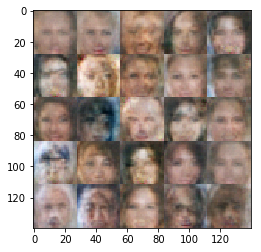

Epoch 1/2... Batch 2210  Discriminator Loss: 2.8355... Generator Loss: 4.2866
Epoch 1/2... Batch 2220  Discriminator Loss: 0.1315... Generator Loss: 9.4454
Epoch 1/2... Batch 2230  Discriminator Loss: 0.9194... Generator Loss: 0.8261
Epoch 1/2... Batch 2240  Discriminator Loss: 0.4256... Generator Loss: 2.1032
Epoch 1/2... Batch 2250  Discriminator Loss: 0.1816... Generator Loss: 2.4536
Epoch 1/2... Batch 2260  Discriminator Loss: 0.0762... Generator Loss: 6.5048
Epoch 1/2... Batch 2270  Discriminator Loss: 1.1447... Generator Loss: 12.2739
Epoch 1/2... Batch 2280  Discriminator Loss: 1.6463... Generator Loss: 1.1181
Epoch 1/2... Batch 2290  Discriminator Loss: 1.4187... Generator Loss: 0.7086
Epoch 1/2... Batch 2300  Discriminator Loss: 1.4825... Generator Loss: 0.7940


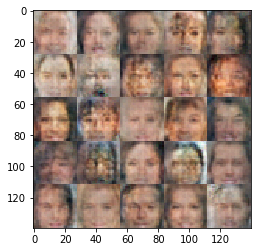

Epoch 1/2... Batch 2310  Discriminator Loss: 1.5019... Generator Loss: 0.5941
Epoch 1/2... Batch 2320  Discriminator Loss: 1.4852... Generator Loss: 0.6225
Epoch 1/2... Batch 2330  Discriminator Loss: 1.2817... Generator Loss: 1.4053
Epoch 1/2... Batch 2340  Discriminator Loss: 0.5800... Generator Loss: 1.7380
Epoch 1/2... Batch 2350  Discriminator Loss: 2.3510... Generator Loss: 0.1375
Epoch 1/2... Batch 2360  Discriminator Loss: 0.3907... Generator Loss: 2.6642
Epoch 1/2... Batch 2370  Discriminator Loss: 0.2131... Generator Loss: 5.0355
Epoch 1/2... Batch 2380  Discriminator Loss: 0.6907... Generator Loss: 2.3336
Epoch 1/2... Batch 2390  Discriminator Loss: 0.1600... Generator Loss: 3.4675
Epoch 1/2... Batch 2400  Discriminator Loss: 0.8621... Generator Loss: 1.7166


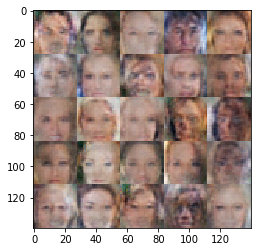

Epoch 1/2... Batch 2410  Discriminator Loss: 0.8112... Generator Loss: 0.9809
Epoch 1/2... Batch 2420  Discriminator Loss: 0.0528... Generator Loss: 5.2681
Epoch 1/2... Batch 2430  Discriminator Loss: 0.8489... Generator Loss: 1.1990
Epoch 1/2... Batch 2440  Discriminator Loss: 0.8605... Generator Loss: 1.4839
Epoch 1/2... Batch 2450  Discriminator Loss: 0.9270... Generator Loss: 10.1086
Epoch 1/2... Batch 2460  Discriminator Loss: 2.0450... Generator Loss: 0.3001
Epoch 1/2... Batch 2470  Discriminator Loss: 1.3438... Generator Loss: 0.7369
Epoch 1/2... Batch 2480  Discriminator Loss: 1.0953... Generator Loss: 0.8031
Epoch 1/2... Batch 2490  Discriminator Loss: 0.5476... Generator Loss: 1.4902
Epoch 1/2... Batch 2500  Discriminator Loss: 0.8928... Generator Loss: 11.9432


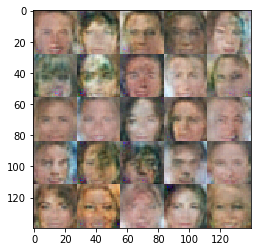

Epoch 1/2... Batch 2510  Discriminator Loss: 1.5460... Generator Loss: 0.3650
Epoch 1/2... Batch 2520  Discriminator Loss: 0.8137... Generator Loss: 1.8476
Epoch 1/2... Batch 2530  Discriminator Loss: 0.6843... Generator Loss: 3.2053
Epoch 1/2... Batch 2540  Discriminator Loss: 0.8098... Generator Loss: 2.1759
Epoch 1/2... Batch 2550  Discriminator Loss: 0.6902... Generator Loss: 1.4110
Epoch 1/2... Batch 2560  Discriminator Loss: 0.6600... Generator Loss: 4.1331
Epoch 1/2... Batch 2570  Discriminator Loss: 0.2595... Generator Loss: 3.1180
Epoch 1/2... Batch 2580  Discriminator Loss: 1.0664... Generator Loss: 0.7177
Epoch 1/2... Batch 2590  Discriminator Loss: 1.7370... Generator Loss: 0.6699
Epoch 1/2... Batch 2600  Discriminator Loss: 0.8049... Generator Loss: 1.4192


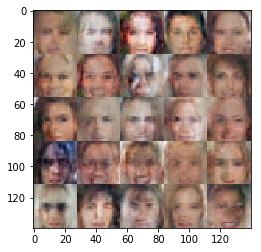

Epoch 1/2... Batch 2610  Discriminator Loss: 1.2426... Generator Loss: 0.5952
Epoch 1/2... Batch 2620  Discriminator Loss: 0.3045... Generator Loss: 4.4085
Epoch 1/2... Batch 2630  Discriminator Loss: 0.5378... Generator Loss: 2.3478
Epoch 1/2... Batch 2640  Discriminator Loss: 0.3535... Generator Loss: 2.2547
Epoch 1/2... Batch 2650  Discriminator Loss: 0.3402... Generator Loss: 4.1148
Epoch 1/2... Batch 2660  Discriminator Loss: 1.8558... Generator Loss: 11.0508
Epoch 1/2... Batch 2670  Discriminator Loss: 0.7814... Generator Loss: 1.2263
Epoch 1/2... Batch 2680  Discriminator Loss: 0.6862... Generator Loss: 2.0072
Epoch 1/2... Batch 2690  Discriminator Loss: 0.5855... Generator Loss: 6.3683
Epoch 1/2... Batch 2700  Discriminator Loss: 0.3334... Generator Loss: 5.1309


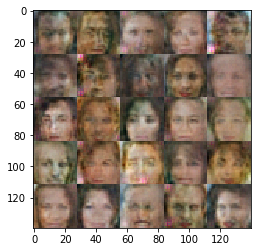

Epoch 1/2... Batch 2710  Discriminator Loss: 1.5066... Generator Loss: 0.4279
Epoch 1/2... Batch 2720  Discriminator Loss: 0.4522... Generator Loss: 1.6460
Epoch 1/2... Batch 2730  Discriminator Loss: 0.3796... Generator Loss: 8.4103
Epoch 1/2... Batch 2740  Discriminator Loss: 0.1852... Generator Loss: 3.2455
Epoch 1/2... Batch 2750  Discriminator Loss: 0.5204... Generator Loss: 1.3744
Epoch 1/2... Batch 2760  Discriminator Loss: 0.7406... Generator Loss: 0.8305
Epoch 1/2... Batch 2770  Discriminator Loss: 0.4723... Generator Loss: 5.0262
Epoch 1/2... Batch 2780  Discriminator Loss: 0.4608... Generator Loss: 1.2294
Epoch 1/2... Batch 2790  Discriminator Loss: 2.1839... Generator Loss: 1.3814
Epoch 1/2... Batch 2800  Discriminator Loss: 1.1737... Generator Loss: 1.0317


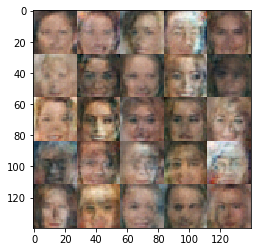

Epoch 1/2... Batch 2810  Discriminator Loss: 1.4162... Generator Loss: 0.7479
Epoch 1/2... Batch 2820  Discriminator Loss: 1.2980... Generator Loss: 0.8050
Epoch 1/2... Batch 2830  Discriminator Loss: 1.6658... Generator Loss: 0.5439
Epoch 1/2... Batch 2840  Discriminator Loss: 1.4428... Generator Loss: 0.7312
Epoch 1/2... Batch 2850  Discriminator Loss: 1.3776... Generator Loss: 0.8510
Epoch 1/2... Batch 2860  Discriminator Loss: 1.2773... Generator Loss: 0.7713
Epoch 1/2... Batch 2870  Discriminator Loss: 1.4089... Generator Loss: 0.8109
Epoch 1/2... Batch 2880  Discriminator Loss: 1.3638... Generator Loss: 0.7257
Epoch 1/2... Batch 2890  Discriminator Loss: 1.4401... Generator Loss: 0.5613
Epoch 1/2... Batch 2900  Discriminator Loss: 1.3584... Generator Loss: 0.5639


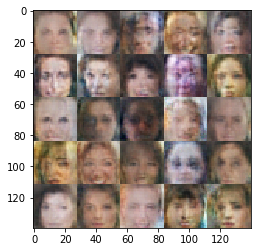

Epoch 1/2... Batch 2910  Discriminator Loss: 1.1993... Generator Loss: 0.8045
Epoch 1/2... Batch 2920  Discriminator Loss: 1.4496... Generator Loss: 0.3941
Epoch 1/2... Batch 2930  Discriminator Loss: 1.2704... Generator Loss: 0.5772
Epoch 1/2... Batch 2940  Discriminator Loss: 1.7964... Generator Loss: 0.2809
Epoch 1/2... Batch 2950  Discriminator Loss: 1.0984... Generator Loss: 0.6485
Epoch 1/2... Batch 2960  Discriminator Loss: 0.5657... Generator Loss: 3.2262
Epoch 1/2... Batch 2970  Discriminator Loss: 0.8103... Generator Loss: 6.1897
Epoch 1/2... Batch 2980  Discriminator Loss: 2.3209... Generator Loss: 0.1927
Epoch 1/2... Batch 2990  Discriminator Loss: 0.5000... Generator Loss: 1.4884
Epoch 1/2... Batch 3000  Discriminator Loss: 1.1607... Generator Loss: 0.5503


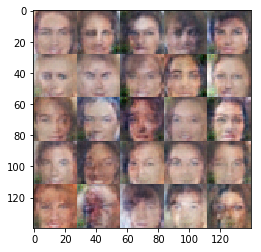

Epoch 1/2... Batch 3010  Discriminator Loss: 0.4431... Generator Loss: 2.3964
Epoch 1/2... Batch 3020  Discriminator Loss: 0.0519... Generator Loss: 8.2321
Epoch 1/2... Batch 3030  Discriminator Loss: 1.2732... Generator Loss: 1.0106
Epoch 1/2... Batch 3040  Discriminator Loss: 1.1863... Generator Loss: 0.9127
Epoch 1/2... Batch 3050  Discriminator Loss: 1.3795... Generator Loss: 0.7053
Epoch 1/2... Batch 3060  Discriminator Loss: 1.3220... Generator Loss: 0.7570
Epoch 1/2... Batch 3070  Discriminator Loss: 1.4520... Generator Loss: 0.7192
Epoch 1/2... Batch 3080  Discriminator Loss: 1.9065... Generator Loss: 0.3403
Epoch 1/2... Batch 3090  Discriminator Loss: 1.4288... Generator Loss: 0.5859
Epoch 1/2... Batch 3100  Discriminator Loss: 1.4181... Generator Loss: 0.7174


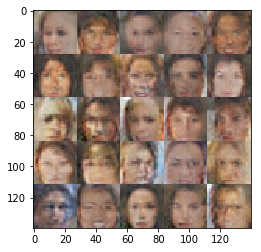

Epoch 1/2... Batch 3110  Discriminator Loss: 1.4316... Generator Loss: 0.5417
Epoch 1/2... Batch 3120  Discriminator Loss: 1.3425... Generator Loss: 0.6516
Epoch 1/2... Batch 3130  Discriminator Loss: 1.3113... Generator Loss: 0.7226
Epoch 1/2... Batch 3140  Discriminator Loss: 0.7337... Generator Loss: 1.5064
Epoch 1/2... Batch 3150  Discriminator Loss: 1.0494... Generator Loss: 3.0027
Epoch 1/2... Batch 3160  Discriminator Loss: 1.3863... Generator Loss: 0.4561
Epoch 2/2... Batch 10  Discriminator Loss: 0.8000... Generator Loss: 2.5927
Epoch 2/2... Batch 20  Discriminator Loss: 1.0280... Generator Loss: 1.0554
Epoch 2/2... Batch 30  Discriminator Loss: 0.4816... Generator Loss: 2.8964
Epoch 2/2... Batch 40  Discriminator Loss: 2.7323... Generator Loss: 1.6945
Epoch 2/2... Batch 50  Discriminator Loss: 1.0670... Generator Loss: 1.1282
Epoch 2/2... Batch 60  Discriminator Loss: 0.7210... Generator Loss: 1.8983
Epoch 2/2... Batch 70  Discriminator Loss: 2.1314... Generator Loss: 0.2100


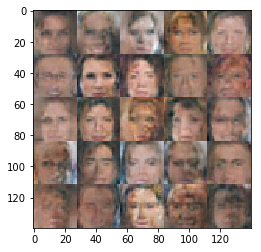

Epoch 2/2... Batch 110  Discriminator Loss: 1.1561... Generator Loss: 0.8436
Epoch 2/2... Batch 120  Discriminator Loss: 1.1514... Generator Loss: 0.7132
Epoch 2/2... Batch 130  Discriminator Loss: 1.0593... Generator Loss: 0.7789
Epoch 2/2... Batch 140  Discriminator Loss: 0.6743... Generator Loss: 1.9554
Epoch 2/2... Batch 150  Discriminator Loss: 0.4858... Generator Loss: 1.8383
Epoch 2/2... Batch 160  Discriminator Loss: 1.7107... Generator Loss: 0.8862
Epoch 2/2... Batch 170  Discriminator Loss: 1.0315... Generator Loss: 0.7158
Epoch 2/2... Batch 180  Discriminator Loss: 0.2069... Generator Loss: 2.8606
Epoch 2/2... Batch 190  Discriminator Loss: 2.0066... Generator Loss: 0.2671
Epoch 2/2... Batch 200  Discriminator Loss: 1.3917... Generator Loss: 0.5386


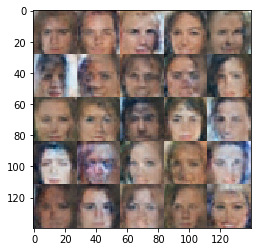

Epoch 2/2... Batch 210  Discriminator Loss: 1.2192... Generator Loss: 0.9851
Epoch 2/2... Batch 220  Discriminator Loss: 0.7407... Generator Loss: 1.7529
Epoch 2/2... Batch 230  Discriminator Loss: 1.6908... Generator Loss: 0.3286
Epoch 2/2... Batch 240  Discriminator Loss: 0.6663... Generator Loss: 2.5565
Epoch 2/2... Batch 250  Discriminator Loss: 2.2082... Generator Loss: 0.2115
Epoch 2/2... Batch 260  Discriminator Loss: 1.0353... Generator Loss: 1.3245
Epoch 2/2... Batch 270  Discriminator Loss: 2.3215... Generator Loss: 1.5297
Epoch 2/2... Batch 280  Discriminator Loss: 1.4334... Generator Loss: 0.5047
Epoch 2/2... Batch 290  Discriminator Loss: 1.2373... Generator Loss: 0.5826
Epoch 2/2... Batch 300  Discriminator Loss: 1.3178... Generator Loss: 0.6467


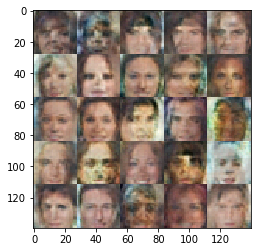

Epoch 2/2... Batch 310  Discriminator Loss: 1.0255... Generator Loss: 1.0083
Epoch 2/2... Batch 320  Discriminator Loss: 1.4769... Generator Loss: 0.6268
Epoch 2/2... Batch 330  Discriminator Loss: 1.2567... Generator Loss: 0.8208
Epoch 2/2... Batch 340  Discriminator Loss: 1.4133... Generator Loss: 1.0947
Epoch 2/2... Batch 350  Discriminator Loss: 1.2811... Generator Loss: 0.4335
Epoch 2/2... Batch 360  Discriminator Loss: 1.0334... Generator Loss: 0.7395
Epoch 2/2... Batch 370  Discriminator Loss: 1.1897... Generator Loss: 0.7127
Epoch 2/2... Batch 380  Discriminator Loss: 1.4613... Generator Loss: 0.5027
Epoch 2/2... Batch 390  Discriminator Loss: 0.4985... Generator Loss: 2.4414
Epoch 2/2... Batch 400  Discriminator Loss: 1.7617... Generator Loss: 0.3335


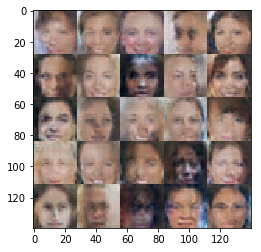

Epoch 2/2... Batch 410  Discriminator Loss: 1.4070... Generator Loss: 0.5174
Epoch 2/2... Batch 420  Discriminator Loss: 0.9598... Generator Loss: 0.8423
Epoch 2/2... Batch 430  Discriminator Loss: 0.9152... Generator Loss: 1.4450
Epoch 2/2... Batch 440  Discriminator Loss: 1.3309... Generator Loss: 0.5113
Epoch 2/2... Batch 450  Discriminator Loss: 1.1287... Generator Loss: 1.0265
Epoch 2/2... Batch 460  Discriminator Loss: 1.4130... Generator Loss: 0.5715
Epoch 2/2... Batch 470  Discriminator Loss: 1.4225... Generator Loss: 0.5635
Epoch 2/2... Batch 480  Discriminator Loss: 1.2336... Generator Loss: 1.0351
Epoch 2/2... Batch 490  Discriminator Loss: 1.7371... Generator Loss: 0.5804
Epoch 2/2... Batch 500  Discriminator Loss: 1.1362... Generator Loss: 1.4113


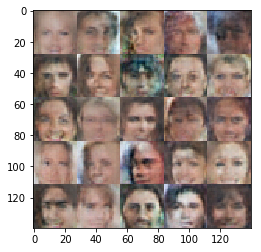

Epoch 2/2... Batch 510  Discriminator Loss: 1.4293... Generator Loss: 0.8494
Epoch 2/2... Batch 520  Discriminator Loss: 1.3235... Generator Loss: 0.7139
Epoch 2/2... Batch 530  Discriminator Loss: 1.2882... Generator Loss: 1.0625
Epoch 2/2... Batch 540  Discriminator Loss: 1.5677... Generator Loss: 0.3525
Epoch 2/2... Batch 550  Discriminator Loss: 1.2078... Generator Loss: 0.7101
Epoch 2/2... Batch 560  Discriminator Loss: 1.8602... Generator Loss: 0.2761
Epoch 2/2... Batch 570  Discriminator Loss: 1.2275... Generator Loss: 1.2831
Epoch 2/2... Batch 580  Discriminator Loss: 0.7473... Generator Loss: 1.3541
Epoch 2/2... Batch 590  Discriminator Loss: 0.6498... Generator Loss: 1.2647
Epoch 2/2... Batch 600  Discriminator Loss: 0.5753... Generator Loss: 1.4345


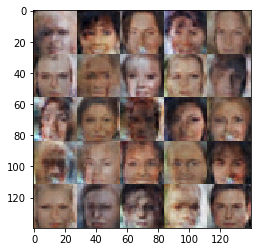

Epoch 2/2... Batch 610  Discriminator Loss: 0.4937... Generator Loss: 1.6433
Epoch 2/2... Batch 620  Discriminator Loss: 1.1779... Generator Loss: 0.8227
Epoch 2/2... Batch 630  Discriminator Loss: 1.0774... Generator Loss: 0.9560
Epoch 2/2... Batch 640  Discriminator Loss: 0.6929... Generator Loss: 3.2583
Epoch 2/2... Batch 650  Discriminator Loss: 1.3931... Generator Loss: 0.6042
Epoch 2/2... Batch 660  Discriminator Loss: 1.4385... Generator Loss: 1.2999
Epoch 2/2... Batch 670  Discriminator Loss: 1.1832... Generator Loss: 0.5312
Epoch 2/2... Batch 680  Discriminator Loss: 1.1422... Generator Loss: 0.6914
Epoch 2/2... Batch 690  Discriminator Loss: 1.3226... Generator Loss: 2.0415
Epoch 2/2... Batch 700  Discriminator Loss: 1.0166... Generator Loss: 6.7729


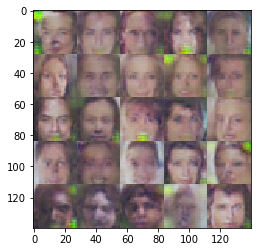

Epoch 2/2... Batch 710  Discriminator Loss: 0.5978... Generator Loss: 3.1037
Epoch 2/2... Batch 720  Discriminator Loss: 0.7381... Generator Loss: 0.9045
Epoch 2/2... Batch 730  Discriminator Loss: 0.4793... Generator Loss: 3.0635
Epoch 2/2... Batch 740  Discriminator Loss: 0.8541... Generator Loss: 0.8798
Epoch 2/2... Batch 750  Discriminator Loss: 0.7034... Generator Loss: 1.0549
Epoch 2/2... Batch 760  Discriminator Loss: 0.0694... Generator Loss: 7.0702
Epoch 2/2... Batch 770  Discriminator Loss: 0.9426... Generator Loss: 1.4116
Epoch 2/2... Batch 780  Discriminator Loss: 0.1837... Generator Loss: 5.2090
Epoch 2/2... Batch 790  Discriminator Loss: 0.0447... Generator Loss: 7.3910
Epoch 2/2... Batch 800  Discriminator Loss: 0.7595... Generator Loss: 1.2725


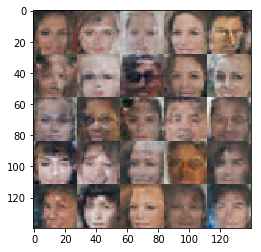

Epoch 2/2... Batch 810  Discriminator Loss: 0.5187... Generator Loss: 1.4437
Epoch 2/2... Batch 820  Discriminator Loss: 0.9266... Generator Loss: 9.4035
Epoch 2/2... Batch 830  Discriminator Loss: 0.8598... Generator Loss: 0.7960
Epoch 2/2... Batch 840  Discriminator Loss: 0.1024... Generator Loss: 4.6145
Epoch 2/2... Batch 850  Discriminator Loss: 0.5652... Generator Loss: 2.9865
Epoch 2/2... Batch 860  Discriminator Loss: 1.5395... Generator Loss: 0.4546
Epoch 2/2... Batch 870  Discriminator Loss: 1.5164... Generator Loss: 0.7349
Epoch 2/2... Batch 880  Discriminator Loss: 1.5998... Generator Loss: 0.3353
Epoch 2/2... Batch 890  Discriminator Loss: 1.5653... Generator Loss: 0.7135
Epoch 2/2... Batch 900  Discriminator Loss: 1.5334... Generator Loss: 0.4875


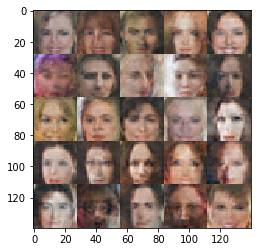

Epoch 2/2... Batch 910  Discriminator Loss: 1.5626... Generator Loss: 0.5718
Epoch 2/2... Batch 920  Discriminator Loss: 1.2629... Generator Loss: 0.6516
Epoch 2/2... Batch 930  Discriminator Loss: 1.3645... Generator Loss: 0.5803
Epoch 2/2... Batch 940  Discriminator Loss: 1.2131... Generator Loss: 0.8684
Epoch 2/2... Batch 950  Discriminator Loss: 1.2391... Generator Loss: 0.8188
Epoch 2/2... Batch 960  Discriminator Loss: 1.4308... Generator Loss: 0.5277
Epoch 2/2... Batch 970  Discriminator Loss: 1.4353... Generator Loss: 0.5804
Epoch 2/2... Batch 980  Discriminator Loss: 1.3091... Generator Loss: 0.5080
Epoch 2/2... Batch 990  Discriminator Loss: 1.4543... Generator Loss: 0.7505
Epoch 2/2... Batch 1000  Discriminator Loss: 1.4733... Generator Loss: 0.9132


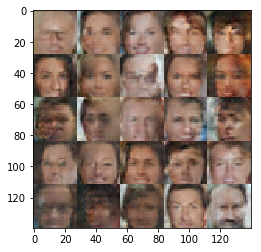

Epoch 2/2... Batch 1010  Discriminator Loss: 1.2915... Generator Loss: 0.6490
Epoch 2/2... Batch 1020  Discriminator Loss: 1.2320... Generator Loss: 0.5064
Epoch 2/2... Batch 1030  Discriminator Loss: 1.3312... Generator Loss: 0.7488
Epoch 2/2... Batch 1040  Discriminator Loss: 1.4973... Generator Loss: 0.8737
Epoch 2/2... Batch 1050  Discriminator Loss: 1.6018... Generator Loss: 0.7173
Epoch 2/2... Batch 1060  Discriminator Loss: 1.4394... Generator Loss: 0.7432
Epoch 2/2... Batch 1070  Discriminator Loss: 1.3591... Generator Loss: 0.8198
Epoch 2/2... Batch 1080  Discriminator Loss: 1.5374... Generator Loss: 0.4130
Epoch 2/2... Batch 1090  Discriminator Loss: 1.3234... Generator Loss: 0.7793
Epoch 2/2... Batch 1100  Discriminator Loss: 1.3264... Generator Loss: 0.7059


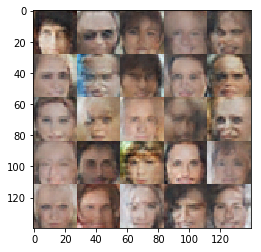

Epoch 2/2... Batch 1110  Discriminator Loss: 1.5177... Generator Loss: 0.5220
Epoch 2/2... Batch 1120  Discriminator Loss: 1.5208... Generator Loss: 0.6958
Epoch 2/2... Batch 1130  Discriminator Loss: 1.2378... Generator Loss: 0.5831
Epoch 2/2... Batch 1140  Discriminator Loss: 1.3497... Generator Loss: 0.6342
Epoch 2/2... Batch 1150  Discriminator Loss: 1.2952... Generator Loss: 0.6467
Epoch 2/2... Batch 1160  Discriminator Loss: 1.4087... Generator Loss: 1.0531
Epoch 2/2... Batch 1170  Discriminator Loss: 1.2509... Generator Loss: 0.6648
Epoch 2/2... Batch 1180  Discriminator Loss: 1.5220... Generator Loss: 0.3615
Epoch 2/2... Batch 1190  Discriminator Loss: 1.6175... Generator Loss: 0.7095
Epoch 2/2... Batch 1200  Discriminator Loss: 1.7381... Generator Loss: 0.3627


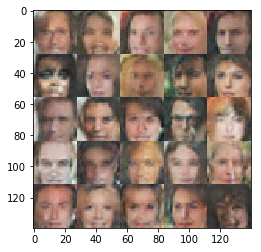

Epoch 2/2... Batch 1210  Discriminator Loss: 1.6788... Generator Loss: 0.4375
Epoch 2/2... Batch 1220  Discriminator Loss: 1.2745... Generator Loss: 0.7058
Epoch 2/2... Batch 1230  Discriminator Loss: 1.3612... Generator Loss: 0.7648
Epoch 2/2... Batch 1240  Discriminator Loss: 1.8458... Generator Loss: 0.2867
Epoch 2/2... Batch 1250  Discriminator Loss: 1.4235... Generator Loss: 0.6925
Epoch 2/2... Batch 1260  Discriminator Loss: 1.4467... Generator Loss: 0.8695
Epoch 2/2... Batch 1270  Discriminator Loss: 1.6988... Generator Loss: 0.3751
Epoch 2/2... Batch 1280  Discriminator Loss: 1.3016... Generator Loss: 0.6543
Epoch 2/2... Batch 1290  Discriminator Loss: 1.1049... Generator Loss: 0.7547
Epoch 2/2... Batch 1300  Discriminator Loss: 1.5280... Generator Loss: 0.7895


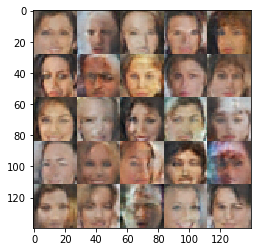

Epoch 2/2... Batch 1310  Discriminator Loss: 1.4558... Generator Loss: 0.3741
Epoch 2/2... Batch 1320  Discriminator Loss: 1.3662... Generator Loss: 0.7132
Epoch 2/2... Batch 1330  Discriminator Loss: 0.5946... Generator Loss: 3.5430
Epoch 2/2... Batch 1340  Discriminator Loss: 1.1077... Generator Loss: 0.8864
Epoch 2/2... Batch 1350  Discriminator Loss: 1.2989... Generator Loss: 0.4875
Epoch 2/2... Batch 1360  Discriminator Loss: 0.7826... Generator Loss: 1.1755
Epoch 2/2... Batch 1370  Discriminator Loss: 1.3629... Generator Loss: 0.5695
Epoch 2/2... Batch 1380  Discriminator Loss: 0.5813... Generator Loss: 4.0092
Epoch 2/2... Batch 1390  Discriminator Loss: 1.5341... Generator Loss: 0.5543
Epoch 2/2... Batch 1400  Discriminator Loss: 0.4436... Generator Loss: 1.9316


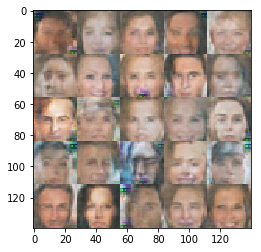

Epoch 2/2... Batch 1410  Discriminator Loss: 0.1216... Generator Loss: 5.4654
Epoch 2/2... Batch 1420  Discriminator Loss: 0.8825... Generator Loss: 2.2359
Epoch 2/2... Batch 1430  Discriminator Loss: 1.6149... Generator Loss: 0.2832
Epoch 2/2... Batch 1440  Discriminator Loss: 1.2933... Generator Loss: 0.5288
Epoch 2/2... Batch 1450  Discriminator Loss: 0.7684... Generator Loss: 1.1550
Epoch 2/2... Batch 1460  Discriminator Loss: 0.3760... Generator Loss: 1.7515
Epoch 2/2... Batch 1470  Discriminator Loss: 0.8909... Generator Loss: 0.9333
Epoch 2/2... Batch 1480  Discriminator Loss: 0.2712... Generator Loss: 8.8205
Epoch 2/2... Batch 1490  Discriminator Loss: 0.0300... Generator Loss: 7.9642
Epoch 2/2... Batch 1500  Discriminator Loss: 0.1117... Generator Loss: 3.1145


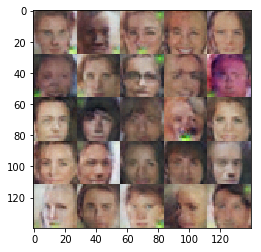

Epoch 2/2... Batch 1510  Discriminator Loss: 0.0303... Generator Loss: 5.8038
Epoch 2/2... Batch 1520  Discriminator Loss: 1.0956... Generator Loss: 2.7370
Epoch 2/2... Batch 1530  Discriminator Loss: 0.1404... Generator Loss: 4.1602
Epoch 2/2... Batch 1540  Discriminator Loss: 0.2845... Generator Loss: 4.6499
Epoch 2/2... Batch 1550  Discriminator Loss: 0.1156... Generator Loss: 9.4093
Epoch 2/2... Batch 1560  Discriminator Loss: 0.3154... Generator Loss: 2.2078
Epoch 2/2... Batch 1570  Discriminator Loss: 0.1368... Generator Loss: 8.6864
Epoch 2/2... Batch 1580  Discriminator Loss: 1.2145... Generator Loss: 0.4730
Epoch 2/2... Batch 1590  Discriminator Loss: 0.0422... Generator Loss: 5.5293
Epoch 2/2... Batch 1600  Discriminator Loss: 0.0623... Generator Loss: 5.0336


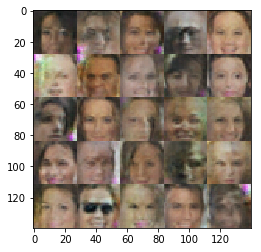

Epoch 2/2... Batch 1610  Discriminator Loss: 3.1199... Generator Loss: 0.2514
Epoch 2/2... Batch 1620  Discriminator Loss: 1.4897... Generator Loss: 0.8183
Epoch 2/2... Batch 1630  Discriminator Loss: 1.5089... Generator Loss: 0.5652
Epoch 2/2... Batch 1640  Discriminator Loss: 1.6504... Generator Loss: 0.5081
Epoch 2/2... Batch 1650  Discriminator Loss: 1.4191... Generator Loss: 0.8095
Epoch 2/2... Batch 1660  Discriminator Loss: 0.7436... Generator Loss: 3.3983
Epoch 2/2... Batch 1670  Discriminator Loss: 0.7826... Generator Loss: 1.2657
Epoch 2/2... Batch 1680  Discriminator Loss: 0.8651... Generator Loss: 0.9423
Epoch 2/2... Batch 1690  Discriminator Loss: 0.7423... Generator Loss: 2.3134
Epoch 2/2... Batch 1700  Discriminator Loss: 0.2392... Generator Loss: 5.9061


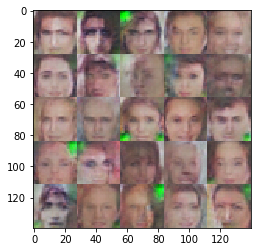

Epoch 2/2... Batch 1710  Discriminator Loss: 0.0491... Generator Loss: 7.1084
Epoch 2/2... Batch 1720  Discriminator Loss: 1.9859... Generator Loss: 0.2730
Epoch 2/2... Batch 1730  Discriminator Loss: 0.9988... Generator Loss: 1.0211
Epoch 2/2... Batch 1740  Discriminator Loss: 1.0999... Generator Loss: 0.4280
Epoch 2/2... Batch 1750  Discriminator Loss: 0.1112... Generator Loss: 4.8645
Epoch 2/2... Batch 1760  Discriminator Loss: 0.0643... Generator Loss: 4.9014
Epoch 2/2... Batch 1770  Discriminator Loss: 0.1729... Generator Loss: 6.6903
Epoch 2/2... Batch 1780  Discriminator Loss: 1.5146... Generator Loss: 0.4569
Epoch 2/2... Batch 1790  Discriminator Loss: 1.3814... Generator Loss: 0.6186
Epoch 2/2... Batch 1800  Discriminator Loss: 1.4294... Generator Loss: 0.5630


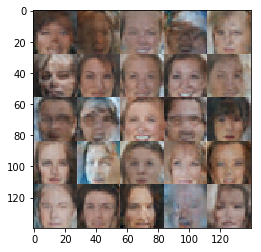

Epoch 2/2... Batch 1810  Discriminator Loss: 1.3616... Generator Loss: 0.6529
Epoch 2/2... Batch 1820  Discriminator Loss: 1.1931... Generator Loss: 0.7405
Epoch 2/2... Batch 1830  Discriminator Loss: 1.5792... Generator Loss: 0.4506
Epoch 2/2... Batch 1840  Discriminator Loss: 1.5451... Generator Loss: 0.4641
Epoch 2/2... Batch 1850  Discriminator Loss: 1.2989... Generator Loss: 0.5584
Epoch 2/2... Batch 1860  Discriminator Loss: 1.3896... Generator Loss: 0.6952
Epoch 2/2... Batch 1870  Discriminator Loss: 1.8442... Generator Loss: 0.4413
Epoch 2/2... Batch 1880  Discriminator Loss: 1.5414... Generator Loss: 0.6826
Epoch 2/2... Batch 1890  Discriminator Loss: 1.2790... Generator Loss: 0.8165
Epoch 2/2... Batch 1900  Discriminator Loss: 1.4377... Generator Loss: 1.1907


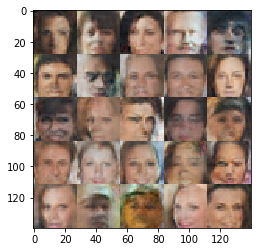

Epoch 2/2... Batch 1910  Discriminator Loss: 1.1584... Generator Loss: 0.5831
Epoch 2/2... Batch 1920  Discriminator Loss: 1.5039... Generator Loss: 0.5696
Epoch 2/2... Batch 1930  Discriminator Loss: 1.3302... Generator Loss: 0.7423
Epoch 2/2... Batch 1940  Discriminator Loss: 1.5677... Generator Loss: 0.6774
Epoch 2/2... Batch 1950  Discriminator Loss: 1.5852... Generator Loss: 0.6347
Epoch 2/2... Batch 1960  Discriminator Loss: 1.4619... Generator Loss: 0.7343
Epoch 2/2... Batch 1970  Discriminator Loss: 1.3853... Generator Loss: 0.5626
Epoch 2/2... Batch 1980  Discriminator Loss: 1.3962... Generator Loss: 0.5739
Epoch 2/2... Batch 1990  Discriminator Loss: 1.4567... Generator Loss: 0.7798
Epoch 2/2... Batch 2000  Discriminator Loss: 1.3648... Generator Loss: 0.6411


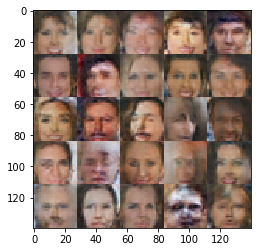

Epoch 2/2... Batch 2010  Discriminator Loss: 1.3510... Generator Loss: 0.7394
Epoch 2/2... Batch 2020  Discriminator Loss: 1.4085... Generator Loss: 0.4622
Epoch 2/2... Batch 2030  Discriminator Loss: 1.6379... Generator Loss: 0.6234
Epoch 2/2... Batch 2040  Discriminator Loss: 1.3679... Generator Loss: 0.7961
Epoch 2/2... Batch 2050  Discriminator Loss: 1.1374... Generator Loss: 0.8329
Epoch 2/2... Batch 2060  Discriminator Loss: 1.1901... Generator Loss: 0.7228
Epoch 2/2... Batch 2070  Discriminator Loss: 1.3987... Generator Loss: 0.5371
Epoch 2/2... Batch 2080  Discriminator Loss: 1.3502... Generator Loss: 0.6631
Epoch 2/2... Batch 2090  Discriminator Loss: 1.3332... Generator Loss: 0.5457
Epoch 2/2... Batch 2100  Discriminator Loss: 1.6698... Generator Loss: 0.3831


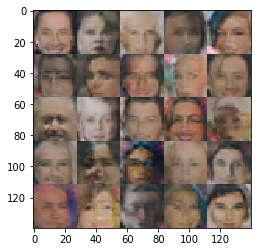

Epoch 2/2... Batch 2110  Discriminator Loss: 1.2976... Generator Loss: 0.6675
Epoch 2/2... Batch 2120  Discriminator Loss: 1.5064... Generator Loss: 0.5989
Epoch 2/2... Batch 2130  Discriminator Loss: 1.4040... Generator Loss: 0.5398
Epoch 2/2... Batch 2140  Discriminator Loss: 1.3839... Generator Loss: 0.5639
Epoch 2/2... Batch 2150  Discriminator Loss: 1.3807... Generator Loss: 0.9691
Epoch 2/2... Batch 2160  Discriminator Loss: 1.5957... Generator Loss: 0.4915
Epoch 2/2... Batch 2170  Discriminator Loss: 1.2269... Generator Loss: 0.5757
Epoch 2/2... Batch 2180  Discriminator Loss: 1.2433... Generator Loss: 0.7515
Epoch 2/2... Batch 2190  Discriminator Loss: 1.2968... Generator Loss: 0.5909
Epoch 2/2... Batch 2200  Discriminator Loss: 1.5148... Generator Loss: 0.6294


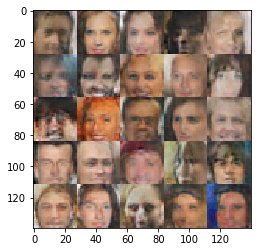

Epoch 2/2... Batch 2210  Discriminator Loss: 1.3406... Generator Loss: 0.5723
Epoch 2/2... Batch 2220  Discriminator Loss: 1.2819... Generator Loss: 0.5602
Epoch 2/2... Batch 2230  Discriminator Loss: 1.3249... Generator Loss: 0.7476
Epoch 2/2... Batch 2240  Discriminator Loss: 1.3257... Generator Loss: 0.7309
Epoch 2/2... Batch 2250  Discriminator Loss: 0.9977... Generator Loss: 0.8641
Epoch 2/2... Batch 2260  Discriminator Loss: 1.2492... Generator Loss: 0.6568
Epoch 2/2... Batch 2270  Discriminator Loss: 1.4315... Generator Loss: 0.6654
Epoch 2/2... Batch 2280  Discriminator Loss: 1.6910... Generator Loss: 0.4370
Epoch 2/2... Batch 2290  Discriminator Loss: 1.3831... Generator Loss: 0.7541
Epoch 2/2... Batch 2300  Discriminator Loss: 1.1190... Generator Loss: 0.8763


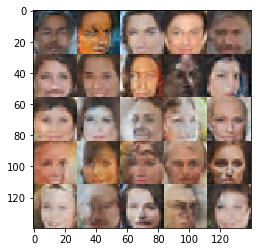

Epoch 2/2... Batch 2310  Discriminator Loss: 1.3584... Generator Loss: 0.7648
Epoch 2/2... Batch 2320  Discriminator Loss: 1.3219... Generator Loss: 0.7209
Epoch 2/2... Batch 2330  Discriminator Loss: 1.1153... Generator Loss: 0.7352
Epoch 2/2... Batch 2340  Discriminator Loss: 1.3909... Generator Loss: 0.6234
Epoch 2/2... Batch 2350  Discriminator Loss: 1.3004... Generator Loss: 0.7018
Epoch 2/2... Batch 2360  Discriminator Loss: 1.1029... Generator Loss: 3.1675
Epoch 2/2... Batch 2370  Discriminator Loss: 0.7765... Generator Loss: 1.1226
Epoch 2/2... Batch 2380  Discriminator Loss: 0.3616... Generator Loss: 2.3467
Epoch 2/2... Batch 2390  Discriminator Loss: 0.2427... Generator Loss: 5.3073
Epoch 2/2... Batch 2400  Discriminator Loss: 0.1698... Generator Loss: 5.0016


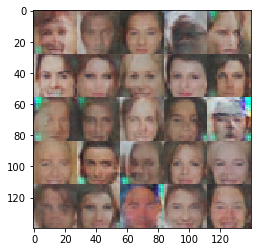

Epoch 2/2... Batch 2410  Discriminator Loss: 1.5239... Generator Loss: 1.8121
Epoch 2/2... Batch 2420  Discriminator Loss: 0.0691... Generator Loss: 3.3929
Epoch 2/2... Batch 2430  Discriminator Loss: 0.1079... Generator Loss: 4.4373
Epoch 2/2... Batch 2440  Discriminator Loss: 1.6593... Generator Loss: 0.2057
Epoch 2/2... Batch 2450  Discriminator Loss: 1.6804... Generator Loss: 0.2808
Epoch 2/2... Batch 2460  Discriminator Loss: 0.2851... Generator Loss: 5.5107
Epoch 2/2... Batch 2470  Discriminator Loss: 0.4006... Generator Loss: 1.3262
Epoch 2/2... Batch 2480  Discriminator Loss: 0.2307... Generator Loss: 2.0048
Epoch 2/2... Batch 2490  Discriminator Loss: 0.0378... Generator Loss: 5.3102
Epoch 2/2... Batch 2500  Discriminator Loss: 0.7405... Generator Loss: 0.8358


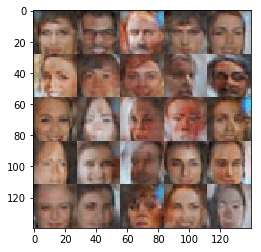

Epoch 2/2... Batch 2510  Discriminator Loss: 0.9324... Generator Loss: 0.7168
Epoch 2/2... Batch 2520  Discriminator Loss: 0.0861... Generator Loss: 3.6689
Epoch 2/2... Batch 2530  Discriminator Loss: 2.2865... Generator Loss: 0.1473
Epoch 2/2... Batch 2540  Discriminator Loss: 0.1357... Generator Loss: 2.6013
Epoch 2/2... Batch 2550  Discriminator Loss: 0.8951... Generator Loss: 0.9068
Epoch 2/2... Batch 2560  Discriminator Loss: 0.2676... Generator Loss: 2.9625
Epoch 2/2... Batch 2570  Discriminator Loss: 0.1900... Generator Loss: 3.0843
Epoch 2/2... Batch 2580  Discriminator Loss: 0.6349... Generator Loss: 0.8493
Epoch 2/2... Batch 2590  Discriminator Loss: 0.6774... Generator Loss: 0.9744
Epoch 2/2... Batch 2600  Discriminator Loss: 1.3468... Generator Loss: 0.9618


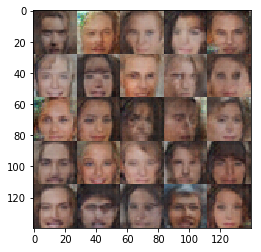

Epoch 2/2... Batch 2610  Discriminator Loss: 1.6793... Generator Loss: 0.2915
Epoch 2/2... Batch 2620  Discriminator Loss: 0.0881... Generator Loss: 3.1826
Epoch 2/2... Batch 2630  Discriminator Loss: 2.3409... Generator Loss: 0.1723
Epoch 2/2... Batch 2640  Discriminator Loss: 2.4230... Generator Loss: 0.6476
Epoch 2/2... Batch 2650  Discriminator Loss: 1.3131... Generator Loss: 0.7166
Epoch 2/2... Batch 2660  Discriminator Loss: 1.1716... Generator Loss: 0.8458
Epoch 2/2... Batch 2670  Discriminator Loss: 1.2673... Generator Loss: 0.6263
Epoch 2/2... Batch 2680  Discriminator Loss: 1.4620... Generator Loss: 0.5137
Epoch 2/2... Batch 2690  Discriminator Loss: 1.8876... Generator Loss: 0.2720
Epoch 2/2... Batch 2700  Discriminator Loss: 1.3622... Generator Loss: 0.7780


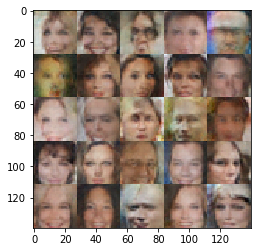

Epoch 2/2... Batch 2710  Discriminator Loss: 1.1493... Generator Loss: 0.8129
Epoch 2/2... Batch 2720  Discriminator Loss: 1.2977... Generator Loss: 0.4795
Epoch 2/2... Batch 2730  Discriminator Loss: 1.5291... Generator Loss: 0.4906
Epoch 2/2... Batch 2740  Discriminator Loss: 0.8148... Generator Loss: 3.3758
Epoch 2/2... Batch 2750  Discriminator Loss: 0.0677... Generator Loss: 4.7535
Epoch 2/2... Batch 2760  Discriminator Loss: 2.0923... Generator Loss: 0.1813
Epoch 2/2... Batch 2770  Discriminator Loss: 0.0618... Generator Loss: 6.2185
Epoch 2/2... Batch 2780  Discriminator Loss: 0.2581... Generator Loss: 8.8226
Epoch 2/2... Batch 2790  Discriminator Loss: 0.4322... Generator Loss: 1.4177
Epoch 2/2... Batch 2800  Discriminator Loss: 0.3099... Generator Loss: 1.8962


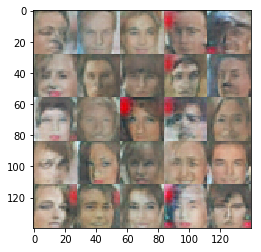

Epoch 2/2... Batch 2810  Discriminator Loss: 1.4484... Generator Loss: 0.6701
Epoch 2/2... Batch 2820  Discriminator Loss: 1.2950... Generator Loss: 0.6704
Epoch 2/2... Batch 2830  Discriminator Loss: 1.3931... Generator Loss: 0.5811
Epoch 2/2... Batch 2840  Discriminator Loss: 1.4783... Generator Loss: 0.6101
Epoch 2/2... Batch 2850  Discriminator Loss: 1.0000... Generator Loss: 0.8957
Epoch 2/2... Batch 2860  Discriminator Loss: 1.5319... Generator Loss: 0.8774
Epoch 2/2... Batch 2870  Discriminator Loss: 1.2644... Generator Loss: 0.7253
Epoch 2/2... Batch 2880  Discriminator Loss: 1.1657... Generator Loss: 0.8162
Epoch 2/2... Batch 2890  Discriminator Loss: 1.3757... Generator Loss: 0.8027
Epoch 2/2... Batch 2900  Discriminator Loss: 1.5338... Generator Loss: 0.4704


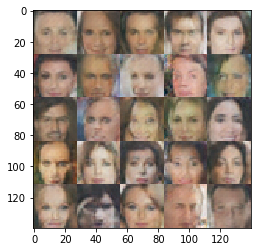

Epoch 2/2... Batch 2910  Discriminator Loss: 1.6167... Generator Loss: 0.5832
Epoch 2/2... Batch 2920  Discriminator Loss: 1.2112... Generator Loss: 0.6070
Epoch 2/2... Batch 2930  Discriminator Loss: 1.3816... Generator Loss: 0.9692
Epoch 2/2... Batch 2940  Discriminator Loss: 1.2647... Generator Loss: 0.7292
Epoch 2/2... Batch 2950  Discriminator Loss: 1.1201... Generator Loss: 0.7328
Epoch 2/2... Batch 2960  Discriminator Loss: 1.3034... Generator Loss: 0.9661
Epoch 2/2... Batch 2970  Discriminator Loss: 0.5898... Generator Loss: 2.8564
Epoch 2/2... Batch 2980  Discriminator Loss: 0.8086... Generator Loss: 1.2939
Epoch 2/2... Batch 2990  Discriminator Loss: 1.5720... Generator Loss: 0.3367
Epoch 2/2... Batch 3000  Discriminator Loss: 1.5047... Generator Loss: 0.9814


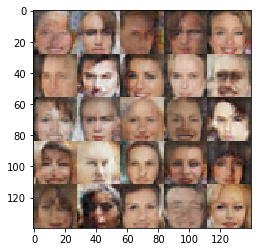

Epoch 2/2... Batch 3010  Discriminator Loss: 0.4934... Generator Loss: 3.0752
Epoch 2/2... Batch 3020  Discriminator Loss: 0.6841... Generator Loss: 1.4796
Epoch 2/2... Batch 3030  Discriminator Loss: 0.0700... Generator Loss: 6.0919
Epoch 2/2... Batch 3040  Discriminator Loss: 0.1115... Generator Loss: 8.7319
Epoch 2/2... Batch 3050  Discriminator Loss: 2.2688... Generator Loss: 0.8898
Epoch 2/2... Batch 3060  Discriminator Loss: 1.3206... Generator Loss: 0.5901
Epoch 2/2... Batch 3070  Discriminator Loss: 1.3908... Generator Loss: 0.5702
Epoch 2/2... Batch 3080  Discriminator Loss: 1.1526... Generator Loss: 0.6535
Epoch 2/2... Batch 3090  Discriminator Loss: 1.7778... Generator Loss: 0.4341
Epoch 2/2... Batch 3100  Discriminator Loss: 1.4195... Generator Loss: 0.4563


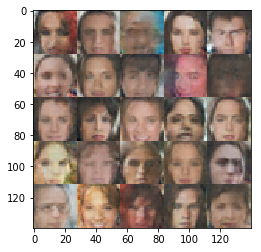

Epoch 2/2... Batch 3110  Discriminator Loss: 1.3274... Generator Loss: 0.5454
Epoch 2/2... Batch 3120  Discriminator Loss: 1.3519... Generator Loss: 0.6161
Epoch 2/2... Batch 3130  Discriminator Loss: 1.2501... Generator Loss: 0.7598
Epoch 2/2... Batch 3140  Discriminator Loss: 1.4046... Generator Loss: 0.6448
Epoch 2/2... Batch 3150  Discriminator Loss: 1.5940... Generator Loss: 0.5786
Epoch 2/2... Batch 3160  Discriminator Loss: 1.3412... Generator Loss: 0.4476


In [93]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 调参记录

更改了模型结构：

* Generator: 7x7x512 ---> 14x14x256 ---> 28x28x128 ---> 28x28x3
* Discriminator：28x28x3 ---> 14x14x64 ---> 7x7x128 ---> 7x7x256
* 学习率 0.00025 ---> Discriminator Loss: 0.4439... Generator Loss: 1.4835 感觉很一般，在2000个batch后，g_loss突然上升了

尝试加入dropout：Discriminator Loss: 1.3863... Generator Loss: 0.4561

最后的模型结构：
* Generator: 7x7x512 ---> 14x14x256 ---> 28x28x128 ---> 28x28x3
* Discriminator：28x28x3 ---> 14x14x64 ---> 7x7x128 ---> 4x4x256

为了查看下模型的最终效果，将迭代次数调整到2次，效果不错，基本看到了人的五官

迭代次数继续增加，应该会得到更好的结果


### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。